In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pip install python-rapidjson

     |████████████████████████████████| 1.4MB 4.1MB/s 


In [0]:
import os
import tweepy as tw
import pandas as pd
import datetime
from tweepy.parsers import JSONParser
import rapidjson
import matplotlib.pyplot as plt
from jsonschema import validate
import numpy as np
import pytz
from datetime import datetime
from dateutil import tz

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
filename = '/content/drive/My Drive/TwitterProject/Twitter_CSV/2018_11_07_all_onepercent.csv'
user_data = pd.read_csv(filename, lineterminator='\n')
user_data.fillna("NA", inplace=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
us_state_set={"alabama","alaska","arizona","arkansas","california",
               "colorado","connecticut","delaware","florida","georgia",
               "hawaii","idaho","illinois","indiana","iowa","kansas","kentucky",
               "louisiana","maine","maryland","massachusetts","michigan","minnesota",
               "mississippi","missouri","montana","nebraska","nevada","newhampshire",
               "newjersey","newmexico","newyork","northcarolina","northdakota","ohio",
               "oklahoma","oregon","pennsylvania","rhodeisland","southcarolina","southdakota",
               "tennessee","texas","utah","vermont","virginia","washington","westvirginia",
               "wisconsin","wyoming","al","ak","az","ar","ca","co","ct","de","fl","ga","hi",
               "id","il","in","ia","ks","ky","la","me","md","ma","mi","mn","ms","mo","mt","ne",
               "nv","nh","nj","nm","ny","nc","nd","oh","ok","or","pa","ri","sc","sd","tn","tx",
               "ut","vt","va","wa","wv","wi","wy","unitedstates","usa","us","unitedstatesofamerica"}

us_cities = {'forthunt','bessemer','paducah','birmingham','centerpoint','cullman','daphne','decatur','dothan','eastflorence','enterprise','fairhope','florence','foley','gadsden','helena','homewood','hoover','hueytown','huntsville','madison','millbrook','mobile','montgomery','mountainbrook','northport','opelika','oxford','pelham','phenixcity','prattville','prichard','selma','talladega','tillmanscorner','troy','trussville','tuscaloosa','vestaviahills','bellavista','benton','bentonville','bryant','cabot','conway','eldorado','fayetteville','fortsmith','hotsprings','jacksonville','jonesboro','littlerock','maumelle','northlittlerock','paragould','pinebluff','rogers','russellville','searcy','siloamsprings','springdale','texarkana','vanburen','westmemphis','washingtond.c.','bear','dover','middletown','newark','wilmington','allapattah','altamontesprings','apopka','auburndale','aventura','bartow','bayonetpoint','bayshoregardens','belleglade','bellview','bloomingdale','bocadelmar','bocaraton','bonitasprings','boyntonbeach','bradenton','brandon','brent','brownsville','buenaventuralakes','cantonment','capecoral','carolcity','carrollwood','carrollwoodvillage','casselberry','citruspark','clearwater','clermont','cocoa','coconutcreek','coconutgrove','coopercity','coralgables','coralsprings','coralterrace','countrywalk','countryclub','crestview','cutler','cutlerridge','daniabeach','davie','daytonabeach','deland','debary','deerfieldbeach','delraybeach','deltona','doral','dunedin','eastlake','eastpensacolaheights','edgewater','egyptlake-leto','ensley','estero','eustis','ferrypass','flagami','flemingisland','floridaridge','fortlauderdale','fortmyers','fortpierce','fortwaltonbeach','fountainebleau','fruitcove','gainesville','glenvarheights','goldengate','goldenglades','greenacrescity','hainescity','hallandalebeach','hialeah','hialeahgardens','holiday','hollywood','homestead','immokalee','iona','ivesestates','jacksonville','jacksonvillebeach','jasmineestates','jupiter','kendalelakes','kendall','keywest','keystone','kissimmee','lakebutler','lakemagdalene','lakemary','lakewales','lakeworth','lakeworthcorridor','lakeland','lakeside','lando\'lakes','largo','lauderdalelakes','lauderhill','lealman','leesburg','lehighacres','leisurecity','lutz','lynnhaven','maitland','marcoisland','margate','meadowwoods','melbourne','merrittisland','miami','miamibeach','miamigardens','miamilakes','miramar','myrtlegrove','naples','navarre','newportrichey','newsmyrnabeach','norland','northfortmyers','northlauderdale','northmiami','northmiamibeach','northport','oakridge','oaklandpark','ocala','ocoee','ojus','opa-locka','orlando','ormondbeach','oviedo','pace','palmbay','palmbeachgardens','palmcity','palmcoast','palmharbor','palmsprings','palmvalley','palmettobay','panamacity','parkland','pembrokepines','pensacola','pinehills','pinecrest','pinellaspark','pinewood','plantcity','plantation','poinciana','pompanobeach','pontevedrabeach','portcharlotte','portorange','portsaintlucie','princeton','puntagorda','puntagordaisles','richmondwest','riverview','rivierabeach','rockledge','royalpalmbeach','ruskin','safetyharbor','saintcloud','st.petersburg','sancarlospark','sanford','sarasota','sebastian','seminole','southbradenton','southmiamiheights','southchase','springhill','stuart','suncitycenter','sunnyislesbeach','sunrise','sunset','sweetwater','tallahassee','tamarac','tamiami','tampa','tarponsprings','tavares','templeterrace','thecrossings','thehammocks','thevillages','threelakes','titusville','town\'n\'country','universitypark','valrico','venice','verobeach','wekiwasprings','wellington','wesleychapel','westchase','westlittleriver','westmelbourne','westpalmbeach','westpark','westpensacola','westandeastlealman','westchester','weston','wintergarden','winterhaven','winterpark','wintersprings','wright','acworth','albany','alpharetta','americus','athens','atlanta','augusta','belvederepark','brookhaven','brunswick','calhoun','canton','carrollton','cartersville','chamblee','columbus','conyers','dalton','decatur','douglasville','dublin','duluth','dunwoody','eastpoint','evans','fayetteville','forestpark','gainesville','griffin','hinesville','kennesaw','kingsland','lagrange','lawrenceville','lithiasprings','mableton','macon','marietta','martinez','mcdonough','milledgeville','newnan','norcross','northatlanta','northdecatur','northdruidhills','peachtreecity','peachtreecorners','perry','pooler','redan','riverdale','rome','roswell','st.marys','sandysprings','savannah','smyrna','snellville','statesboro','stockbridge','sugarhill','suwanee','thomasville','tifton','tucker','unioncity','valdosta','warnerrobins','wilmingtonisland','winder','woodstock','alton','belleville','carbondale','charleston','collinsville','decatur','eastsaintlouis','edwardsville','fairviewheights','godfrey','granitecity','jacksonville','marion','mattoon','mountvernon','o\'fallon','quincy','springfield','upperalton','avon','bloomington','broadripple','brownsburg','carmel','clarksville','columbus','evansville','fishers','greenfield','greenwood','indianapolis','jasper','jeffersonville','lawrence','newalbany','newcastle','plainfield','richmond','seymour','shelbyville','terrehaute','vincennes','zionsville','derby','emporia','gardner','greatbend','hays','hutchinson','junctioncity','kansascity','lawrence','leavenworth','leawood','lenexa','manhattan','newton','olathe','overlandpark','pittsburg','prairievillage','salina','shawnee','topeka','wichita','ashland','bowlinggreen','burlington','covington','danville','elizabethtown','erlanger','ferncreek','florence','fortthomas','frankfort','georgetown','henderson','highview','hopkinsville','independence','ironville','jeffersontown','lexington','lexington-fayette','louisville','madisonville','meads','murray','newburg','newport','nicholasville','okolona','owensboro','pleasureridgepark','radcliff','richmond','saintmatthews','shelbyville','shively','valleystation','winchester','alexandria','batonrouge','bayoucane','bossiercity','central','chalmette','estelle','gretna','hammond','harvey','houma','kenner','lafayette','lakecharles','laplace','marrero','metairie','metairieterrace','monroe','natchitoches','newiberia','neworleans','opelousas','prairieville','ruston','shenandoah','shreveport','slidell','sulphur','terrytown','zachary','aberdeen','adelphi','annapolis','arbutus','arnold','aspenhill','baltimore','ballengercreek','beltsville','bethesda','bowie','calverton','campsprings','carney','catonsville','chillum','cloverly','clinton','cockeysville','collegepark','columbia','crofton','cumberland','damascus','dundalk','eastriverdale','easton','edgewood','eldersburg','elkton','elkridge','ellicottcity','essex','fairland','ferndale','fortwashington','frederick','gaithersburg','germantown','glassmanor','glenburnie','greenhaven','greenbelt','hagerstown','hanover','hillcrestheights','huntvalley','hyattsville','ilchester','lakeshore','landover','langleypark','laurel','lochearn','marylandcity','middleriver','milfordmill','montgomeryvillage','northbelair','northbethesda','northpotomac','odenton','olney','owingsmills','oxonhill','parkville','parole','pasadena','perryhall','pikesville','potomac','randallstown','redland','reisterstown','rockville','rosedale','rossville','saintcharles','salisbury','scaggsville','seabrook','severn','severnapark','silverspring','southbelair','southgate','southlaurel','suitland','takomapark','towson','waldorf','westelkridge','westminster','wheaton','whiteoak','woodlawn','affton','arnold','ballwin','belton','bluesprings','capegirardeau','chesterfield','clayton','columbia','concord','crevecoeur','eastindependence','farmington','ferguson','florissant','gladstone','grandview','hannibal','hazelwood','independence','jeffersoncity','joplin','kansascity','kirkwood','lee\'ssummit','lemay','liberty','manchester','marylandheights','mehlville','nixa','o\'fallon','oakville','overland','ozark','poplarbluff','raymore','raytown','republic','rolla','saintcharles','saintjoseph','st.louis','saintpeters','sedalia','sikeston','spanishlake','springfield','universitycity','warrensburg','webstergroves','wentzville','wildwood','biloxi','brandon','clarksdale','clinton','columbus','gautier','greenville','greenwood','gulfport','hattiesburg','hernando','hornlake','jackson','laurel','longbeach','madison','meridian','natchez','oceansprings','olivebranch','oxford','pascagoula','pearl','ridgeland','southaven','starkville','tupelo','vicksburg','westgulfport','albemarle','apex','asheboro','asheville','boone','burlington','carrboro','cary','chapelhill','charlotte','clayton','clemmons','concord','cornelius','durham','eden','elizabethcity','fayetteville','fuquay-varina','garner','gastonia','goldsboro','greensboro','greenville','havelock','henderson','hickory','highpoint','hollysprings','hopemills','huntersville','indiantrail','jacksonville','kannapolis','kernersville','kinston','laurinburg','leland','lenoir','lexington','lumberton','matthews','minthill','monroe','mooresville','morganton','morrisville','newbern','pinehurst','raleigh','roanokerapids','rockymount','salisbury','sanford','shelby','stallings','statesville','thomasville','wakeforest','westraleigh','wilmington','wilson','winston-salem','atlanticcity','bridgeton','camden','cherryhill','glassboro','jackson','lindenwold','mapleshade','millville','mountlaurel','oceanacres','pennsauken','pleasantville','sicklerville','southvineland','tomsriver','vineland','williamstown','athens','beavercreek','centerville','cincinnati','columbus','dayton','fairborn','fairfield','forestpark','grovecity','hamilton','huberheights','kettering','lancaster','lebanon','mason','miamisburg','middletown','norwood','oxford','pataskala','pickerington','portsmouth','reynoldsburg','riverside','springboro','springfield','trotwood','upperarlington','vandalia','whiteoak','whitehall','xenia','zanesville','ada','altus','ardmore','bartlesville','bethany','bixby','brokenarrow','chickasha','claremore','delcity','duncan','durant','edmond','elreno','enid','jenks','lawton','mcalester','midwestcity','moore','muskogee','mustang','norman','oklahomacity','owasso','poncacity','sandsprings','sapulpa','shawnee','stillwater','tahlequah','tulsa','yukon','chambersburg','chester','drexelhill','hanover','philadelphia','springfield','westchester','york','aiken','anderson','bluffton','charleston','clemson','columbia','conway','easley','florence','goosecreek','greenville','greenwood','greer','hanahan','hiltonheadisland','hiltonhead','lexington','mauldin','mountpleasant','myrtlebeach','northaugusta','northcharleston','northmyrtlebeach','rockhill','saintandrews','sevenoaks','simpsonville','socastee','spartanburg','summerville','sumter','taylors','wadehampton','westcolumbia','bartlett','brentwood','brentwoodestates','bristol','chattanooga','clarksville','cleveland','collierville','columbia','cookeville','dickson','dyersburg','eastbrainerd','eastchattanooga','eastridge','farragut','franklin','gallatin','germantown','goodlettsville','greeneville','hendersonville','jackson','johnsoncity','kingsport','knoxville','lavergne','lebanon','maryville','memphis','morristown','mountjuliet','murfreesboro','nashville','newsouthmemphis','oakridge','sevierville','shelbyville','smyrna','springhill','springfield','tullahoma','abilene','addison','alamo','aldine','alice','allen','alton','alvin','angleton','arlington','atascocita','austin','balchsprings','baytown','beaumont','bedford','bellaire','belton','benbrook','brenham','brownsville','brownwood','brushycreek','bryan','burleson','canyonlake','carrollton','cedarhill','cedarpark','channelview','cibolo','cincoranch','cleburne','cloverleaf','collegestation','colleyville','conroe','converse','coppell','copperascove','corinth','corpuschristi','corsicana','cypress','dallas','desoto','deerpark','denison','denton','dickinson','donna','duncanville','edinburg','ennis','euless','farmersbranch','flowermound','forney','fortworth','fresno','friendswood','frisco','gainesville','galveston','garland','gatesville','georgetown','grandprairie','grapevine','greenville','groves','haltomcity','harkerheights','harlingen','highlandvillage','houston','humble','huntsville','hurst','hutto','irving','lakeridge','laurel','leesburg','lincolnia','lintonhall','lorton','lynchburg','manassas','manassaspark','mclean','mechanicsville','merrifield','montclair','newportnews','norfolk','oakton','petersburg','portsmouth','portsmouthheights','radford','reston','richmond','roanoke','rosehill','salem','shortpump','southriding','southsuffolk','springfield','staunton','sterling','sudley','suffolk','tuckahoe','tysonscorner','vienna','virginiabeach','waynesboro','westfallschurch','westlynchburg','westspringfield','williamsburg','winchester','wolftrap','woodlawn','beckley','charleston','clarksburg','fairmont','huntington','martinsburg','morgantown','parkersburg','sherwood','franklin','chillicothe','baycity','alabaster','albertville','anniston','athens','auburn','glendaleheights','northandover','revere','danbury','darien','inkster','clevelandheights','easthartford','easthaven','eastnorwalk','enfield','fairfield','farmington','glastonbury','guilford','hamden','hartford','killinglycenter','ledyard','madison','manchester','mansfieldcity','meriden','middletown','milford','montvillecenter','naugatuck','newbritain','newcanaan','newhaven','newlondon','newington','northhaven','northstamford','norwalk','norwich','plainfield','plainville','seymour','shelton','southwindsor','southbury','stamford','storrs','stratford','torrington','trumbull','wallingford','waterbury','westhartford','westhaven','westtorrington','westport','wethersfield','willimantic','wilton','windham','windsor','wolcott','altoona','ames','ankeny','bettendorf','burlington','cedarfalls','cedarrapids','clinton','clive','clive','coralville','councilbluffs','davenport','desmoines','dubuque','fortdodge','indianola','iowacity','johnston','marion','marshalltown','masoncity','muscatine','newton','northliberty','ottumwa','siouxcity','urbandale','waterloo','waukee','westdesmoines','addison','algonquin','alsip','arlingtonheights','aurora','bartlett','batavia','bellwood','belvidere','bensenville','berwyn','bloomingdale','bloomington','blueisland','bolingbrook','bourbonnais','bradley','bridgeview','brookfield','buffalogrove','burbank','calumetcity','carolstream','carpentersville','cary','champaign','chicago','chicagoheights','cicero','countryclubhills','cresthill','crystallake','danville','darien','dekalb','deerfield','desplaines','dixon','dolton','downersgrove','eastmoline','eastpeoria','elgin','elkgrovevillage','elmhurst','elmwoodpark','evanston','evergreenpark','frankfort','franklinpark','freeport','galesburg','geneva','glenellyn','glenview','goodingsgrove','grayslake','gurnee','hanoverpark','harvey','highlandpark','hinsdale','hoffmanestates','homerglen','homewood','huntley','joliet','kankakee','lagrange','lakeforest','lakezurich','lakeinthehills','lansing','lemont','libertyville','lisle','lockport','lombard','lovespark','machesneypark','macomb','matteson','maywood','mchenry','melrosepark','mokena','moline','montgomery','morton','mortongrove','mountprospect','mundelein','naperville','newlenox','niles','normal','northaurora','northchicago','northpeoria','northbrook','oakforest','oaklawn','oakpark','orlandpark','oswego','ottawa','palatine','paloshills','parkforest','parkridge','pekin','peoria','plainfield','prospectheights','rockisland','rockford','rollingmeadows','romeoville','roselle','roundlake','roundlakebeach','saintcharles','schaumburg','shorewood','skokie','southelgin','southholland','sterling','streamwood','sycamore','tinleypark','urbana','vernonhills','villapark','wasco','washington','waukegan','westchicago','westchester','westmont','wheaton','wheeling','wilmette','woodridge','woodstock','yorkville','zion','anderson','crawfordsville','crownpoint','dyer','eastchicago','elkhart','fortwayne','frankfort','gary','goshen','granger','griffith','hammond','highland','hobart','huntington','kokomo','laporte','lafayette','lebanon','logansport','marion','merrillville','michigancity','mishawaka','muncie','munster','newhaven','noblesville','portage','schererville','southbend','valparaiso','westlafayette','westfield','abington','acton','agawam','amesbury','amherst','amherstcenter','arlington','ashland','attleboro','auburn','barnstable','belmont','beverly','beverlycove','billerica','boston','braintree','brockton','brookline','burlington','cambridge','canton','chelmsford','chelsea','chicopee','concord','danvers','dedham','dracut','eastlongmeadow','easthampton','easton','everett','fairhaven','fallriver','fitchburg','framingham','framinghamcenter','franklin','gardner','gloucester','grafton','greenfield','hanover','haverhill','holden','holyoke','jamaicaplain','lawrence','leominster','lexington','longmeadow','lowell','ludlow','lynn','malden','mansfield','marblehead','marlborough','medford','melrose','methuen','middleborough','milford','milton','natick','needham','newbedford','newburyport','newton','northchicopee','northampton','norton','norwood','palmer','peabody','pittsfield','quincy','randolph','reading','rockland','salem','saugus','shrewsbury','somerset','somerville','southboston','southhadley','southpeabody','southbridge','springfield','stoneham','stoughton','sudbury','swansea','taunton','tewksbury','wakefield','waltham','watertown','wellesley','westspringfield','westfield','westford','weymouth','wilmington','winchester','winthrop','woburn','worcester','yarmouth','auburn','augusta','bangor','biddeford','brunswick','lewiston','portland','saco','sanford','southportland','southportlandgardens','waterville','westscarborough','westbrook','adrian','allenpark','allendale','annarbor','auburnhills','battlecreek','baycity','berkley','birmingham','burton','canton','clintontownship','dearborn','dearbornheights','detroit','eastlansing','eastpointe','farmingtonhills','ferndale','flint','foresthills','gardencity','grandrapids','grandville','grossepointewoods','hamtramck','haslett','hazelpark','holland','holt','ironriver','jackson','jenison','kalamazoo','kentwood','lansing','lincolnpark','livonia','madisonheights','marquette','midland','monroe','mountclemens','mountpleasant','muskegon','nortonshores','novi','oakpark','okemos','pontiac','porthuron','portage','redford','rochesterhills','romulus','roseville','royaloak','saginaw','shelby','southfield','southgate','saintclairshores','sterlingheights','taylor','traversecity','trenton','troy','walker','warren','waterford','waverly','wayne','westland','wyandotte','wyoming','ypsilanti','albertlea','andover','anoka','applevalley','austin','blaine','bloomington','brooklyncenter','brooklynpark','buffalo','burnsville','champlin','chanhassen','chaska','columbiaheights','coonrapids','cottagegrove','crystal','duluth','eagan','edenprairie','edina','elkriver','faribault','farmington','forestlake','fridley','goldenvalley','hamlake','hastings','hibbing','hopkins','invergroveheights','lakeville','linolakes','mankato','maplegrove','maplewood','minneapolis','minnetonka','minnetonkamills','moorhead','newbrighton','newhope','northfield','oakdale','otsego','owatonna','plymouth','priorlake','ramsey','redwing','richfield','rochester','rosemount','roseville','saintcloud','saintlouispark','saintmichael','saintpaul','sartell','savage','shakopee','shoreview','southsaintpaul','stillwater','westcoonrapids','westsaintpaul','whitebearlake','willmar','winona','woodbury','kirksville','fargo','grandforks','jamestown','westfargo','bellevue','columbus','fremont','grandisland','hastings','kearney','lavista','lincoln','norfolk','omaha','papillion','bedford','concord','derry','derryvillage','dover','eastconcord','keene','laconia','manchester','merrimack','nashua','portsmouth','rochester','salem','asburypark','avenel','bayonne','belleville','bergenfield','bloomfield','carteret','cliffsidepark','clifton','colonia','cranford','dover','dumont','eastbrunswick','eastorange','edison','elizabeth','elmwoodpark','englewood','ewing','fairlawn','fords','fortlee','garfield','hackensack','harrison','hawthorne','hillside','hoboken','hopatconghills','irvington','iselin','jerseycity','kearny','lakewood','linden','livingston','lodi','longbranch','lyndhurst','madison','mahwah','maplewood','marlboro','montclair','morristown','newbrunswick','newmilford','newark','northarlington','northbergen','northplainfield','nutley','oldbridge','orange','palisadespark','paramus','parsippany','passaic','paterson','perthamboy','piscataway','plainfield','pointpleasant','princeton','rahway','ramsey','ridgewood','roselle','rutherford','sayreville','sayrevillejunction','scotchplains','secaucus','somerset','southoldbridge','southorange','southplainfield','southriver','summit','teaneck','tintonfalls','trenton','union','unioncity','voorhees','wayne','westmilford','westnewyork','westorange','westfield','willingboro','woodbridge','wyckoff','albany','amherst','amsterdam','astoria','auburn','baldwin','batavia','bathbeach','bayshore','baychester','bayside','bellmore','bensonhurst','bethpage','binghamton','boroughpark','brentwood','brighton','brightonbeach','thebronx','brooklyn','brownsville','buffalo','bushwick','cambriaheights','canarsie','centereach','centralislip','cheektowaga','cohoes','collegepoint','commack','coneyisland','copiague','coram','corona','cortland','cypresshills','deerpark','depew','dixhills','dykerheights','eastflatbush','eastmeadow','eastmassapequa','eastnewyork','eastnorthport','eastpatchogue','eastsetauket','easttremont','eastchester','eastchester','eggertsville','elmhurst','elmira','elmont','emersonhill','farrockaway','farmingville','flatbush','flatlands','floralpark','fordham','foresthills','forthamilton','franklinsquare','freeport','freshmeadows','gardencity','glencove','glendale','gloversville','grandisland','graniteville','gravesend','greatkills','greenburgh','harlem','harrison','hauppauge','hempstead','hicksville','hillside','holbrook','holtsville','howardbeach','huntington','huntingtonstation','irondequoit','islip','ithaca','jacksonheights','jamaica','jamestown','kenmore','kensington','kewgardens','kingsbridge','kingspark','kingston','kiryasjoel','lackawanna','lakeronkonkoma','laurelton','levittown','lindenhurst','lockport','longbeach','longislandcity','lynbrook','mamaroneck','manhattan','marinersharbor','maspeth','massapequa','massapequapark','mastic','medford','melrose','melville','merrick','middlevillage','middletown','mineola','monsey','morrisheights','morrisania','motthaven','mountvernon','nanuet','newcity','newrochelle','newspringville','newyorkcity','newburgh','niagarafalls','northamityville','northbabylon','northbayshore','northbellmore','northmassapequa','northtonawanda','northvalleystream','oceanside','ossining','oswego','ozonepark','parkchester','pearlriver','peekskill','plainview','plattsburgh','portchester','portrichmond','portwashington','poughkeepsie','queensvillage','queens','queensbury','regopark','richmondhill','rochester','rockvillecentre','rome','ronkonkoma','roosevelt','rosedale','rossville','rotterdam','rye','saratogasprings','sayville','scarsdale','schenectady','seaford','selden','sheepsheadbay','shirley','smithtown','springfieldgardens','springvalley','statenisland','sunnyside','syosset','syracuse','terraceheights','throgsneck','tremont','troy','uniondale','unionport','universityheights','utica','valleystream','vannest','wakefield','wantagh','washingtonheights','watertown','westalbany','westbabylon','westhempstead','westislip','westseneca','westbury','whiteplains','whitestone','woodhaven','woodmere','woodrow','woodside','yonkers','akron','alliance','ashland','ashtabula','aurora','austintown','avon','avoncenter','avonlake','barberton','bayvillage','berea','boardman','bowlinggreen','broadviewheights','brookpark','brunswick','canton','cleveland','cuyahogafalls','defiance','delaware','dublin','eastcleveland','eastlake','elyria','euclid','fairviewpark','findlay','fremont','gahanna','garfieldheights','green','hilliard','hudson','kent','lakewood','lima','lorain','mansfield','mapleheights','marion','marysville','massillon','mayfieldheights','medina','mentor','middleburgheights','mountvernon','newphiladelphia','newark','niles','northcanton','northolmsted','northridgeville','northroyalton','norwalk','oregon','painesville','parma','parmaheights','perrysburg','piqua','rockyriver','sandusky','shakerheights','sidney','solon','southeuclid','steubenville','stow','streetsboro','strongsville','sylvania','tallmadge','tiffin','toledo','troy','twinsburg','wadsworth','warren','westerville','westlake','willoughby','wooster','youngstown','allentown','allisonpark','altoona','backmountain','baldwin','bethelpark','bethlehem','carlisle','easton','erie','harrisburg','hazleton','hermitage','johnstown','kingofprussia','lancaster','lansdale','lebanon','levittown','limerick','mckeesport','monroeville','mountlebanon','murrysville','newcastle','norristown','pennhills','phoenixville','pittsburgh','plum','pottstown','radnor','reading','scranton','statecollege','uppersaintclair','wayne','westmifflin','whitehalltownship','wilkes-barre','wilkinsburg','williamsport','willowgrove','barrington','bristol','centralfalls','coventry','cranston','cumberland','eastprovidence','middletown','newport','northkingstown','northprovidence','pawtucket','portsmouth','providence','smithfield','warwick','westwarwick','westerly','woonsocket','aberdeen','brookings','mitchell','siouxfalls','watertown','burlington','colchester','rutland','southburlington','appleton','ashwaubenon','beaverdam','bellevue','beloit','brookfield','caledonia','cudahy','depere','eauclaire','fitchburg','fonddulac','franklin','germantown','greenbay','greenfield','howard','janesville','kaukauna','kenosha','lacrosse','madison','manitowoc','marshfield','menasha','menomoneefalls','menomonie','mequon','middleton','milwaukee','muskego','neenah','newberlin','northlacrosse','oakcreek','oconomowoc','onalaska','oshkosh','pleasantprairie','racine','riverfalls','sheboygan','southmilwaukee','stevenspoint','sunprairie','superior','watertown','waukesha','wausau','wauwatosa','westallis','westbend','weston','wisconsinrapids','weirton','weirtonheights','wheeling','ansonia','bridgeport','bristol','branford','cheshire','fillmore','buckeye','bullheadcity','casagrande','casasadobes','catalinafoothills','chandler','douglas','drexelheights','elmirage','eloy','flagstaff','florence','flowingwells','fortunafoothills','fountainhills','gilbert','glendale','goodyear','greenvalley','kingman','lakehavasucity','marana','maricopa','mesa','nogales','orovalley','payson','peoria','phoenix','prescott','prescottvalley','queencreek','riorico','sahuarita','sanluis','scottsdale','sierravista','somerton','suncity','suncitywest','surprise','tanqueverde','tempe','tempejunction','tucson','yuma','adelanto','agoura','agourahills','alameda','albany','alhambra','alisoviejo','altadena','alumrock','americancanyon','anaheim','antelope','antioch','applevalley','arcadia','arroyogrande','artesia','arvin','ashland','atascadero','atwater','avocadoheights','azusa','bakersfield','baldwinpark','banning','barstow','barstowheights','baypoint','beaumont','bell','bellgardens','bellflower','belmont','benicia','berkeley','beverlyhills','bloomington','blythe','bostonia','boyleheights','brawley','brea','brentwood','buenapark','burbank','burlingame','calabasas','calexico','camarillo','cameronpark','campbell','canogapark','carlsbad','carmichael','carson','castaic','castrovalley','cathedralcity','ceres','cerritos','chatsworth','chico','chino','chinohills','chowchilla','chulavista','citrusheights','claremont','clearlake','clovis','coachella','coalinga','colton','compton','concord','corcoran','corona','coronado','costamesa','covina','cudahy','culvercity','cupertino','cypress','dalycity','danapoint','danville','davis','delano','deserthotsprings','diamondbar','dinuba','dixon','downey','duarte','dublin','eastranchodominguez','easthemet','eastlosangeles','eastpaloalto','elcajon','elcentro','elcerrito','eldoradohills','elmonte','elsegundo','elkgrove','encinitas','escondido','fairoaks','fairfield','fallbrook','florin','folsom','fontana','foothillfarms','fostercity','fountainvalley','fremont','fresno','fullerton','galt','gardengrove','gardena','gilroy','glenavon','glendale','glendora','goleta','granitebay','greenfield','haciendaheights','hanford','hawthorne','hayward','hemet','hercules','hermosabeach','hesperia','highland','hollister','hollywood','huntingtonbeach','huntingtonpark','imperial','imperialbeach','indio','inglewood','irvine','lodi','lomalinda','lomita','lompoc','longbeach','losaltos','losangeles','losbanos','losgatos','lynwood','madera','manhattanbeach','manteca','marina','martinez','maywood','meadvalley','menifee','menlopark','merced','millbrae','milpitas','miraloma','miramesa','missionviejo','modesto','monrovia','montclair','montebello','monterey','montereypark','moorpark','moraga','morenovalley','morganhill','mountainview','murrieta','napa','nationalcity','newark','newportbeach','nipomo','norco','northglendale','northhighlands','northhollywood','northridge','norwalk','novato','oakdale','oakland','oakley','oceanside','oildale','ontario','orange','orangevale','orcutt','orinda','oroville','oxnard','oxnardshores','pacifica','pacificgrove','palmdesert','palmsprings','palmdale','paloalto','paradise','paramount','parlier','pasadena','pasorobles','patterson','perris','petaluma','picorivera','pinole','pittsburg','placentia','pleasanthill','pleasanton','pomona','porthueneme','porterville','poway','prunedale','ramona','ranchocordova','ranchocucamonga','ranchomirage','ranchopalosverdes','ranchopenasquitos','ranchosandiego','ranchosantamargarita','redlands','redondobeach','redwoodcity','reedley','rialto','richmond','ridgecrest','riolinda','ripon','riverbank','riverside','rocklin','rohnertpark','rosamond','rosemead','rosemont','roseville','rowlandheights','rubidoux','sacramento','salinas','sanbernardino','sanbruno','sancarlos','sanclemente','sandiego','sandimas','sanfernando','sanfrancisco','sangabriel','sanjacinto','sanjose','sanjuancapistrano','sanleandro','sanlorenzo','sanluisobispo','sanmarcos','sanmateo','sanpablo','sanpedro','sanrafael','sanramon','sanger','santaana','santabarbara','santaclara','santaclarita','santacruz','santafesprings','santamaria','santamonica','santapaula','santarosa','santee','saratoga','sealbeach','seaside','selma','shafter','shermanoaks','simivalley','soledad','southelmonte','southgate','southlaketahoe','southpasadena','southsanfrancisco','southsanjosehills','southwhittier','southyubacity','springvalley','stanton','stockton','suisun','suncity','sunland','sunnyvale','temecula','templecity','thousandoaks','torrance','tracy','truckee','tujunga','tulare','turlock','tustin','northtustin','twentyninepalms','ukiah','unioncity','universalcity','upland','walnutpark','watsonville','westcarson','westcovina','westhollywood','westpuentevalley','westsacramento','westminster','westmont','whittier','wildomar','willowbrook','windsor','wintergardens','woodland','woodlandhills','yorbalinda','yubacity','yucaipa','yuccavalley','arvada','aurora','brighton','broomfield','caм±oncity','castlerock','castlewood','centennial','cimarronhills','clifton','coloradosprings','columbine','commercecity','denver','durango','englewood','fountain','golden','grandjunction','greenwoodvillage','highlandsranch','kencaryl','lafayette','lakewood','littleton','louisville','montrose','northglenn','parker','pueblo','pueblowest','sherrelwood','southglenn','thornton','westminster','wheatridge','dodgecity','gardencity','liberal','alamogordo','albuquerque','carlsbad','clovis','farmington','gallup','hobbs','lascruces','loslunas','riorancho','riorancho','roswell','santafe','southvalley','sunlandpark','bouldercity','carsoncity','enterprise','fernley','henderson','lasvegas','mesquite','northlasvegas','pahrump','paradise','reno','spanishsprings','sparks','springvalley','sunvalley','sunrisemanor','whitney','winchester','amarillo','bigspring','delrio','dumas','eaglepass','elpaso','hereford','horizoncity','lubbock','midland','odessa','pampa','plainview','sanangelo','socorro','socorromissionnumber1colonia','westodessa','cedarcity','hurricane','saintgeorge','washington','wasco','anthem','apachejunction','avondale','juneau','arcata','bayside','eureka','mckinleyville','redding','susanville','boulder','erie','evans','fortcollins','greeley','longmont','loveland','windsor','boise','caldwell','coeurd\'alene','eagle','idahofalls','kuna','lewiston','lewistonorchards','meridian','moscow','nampa','pocatello','postfalls','rexburg','twinfalls','billings','bozeman','butte','greatfalls','helena','kalispell','missoula','bismarck','dickinson','mandan','minot','williston','northplatte','elko','albany','aloha','altamont','ashland','beaverton','bend','bethany','canby','centralpoint','coosbay','corvallis','dallas','eugene','forestgrove','fourcorners','grantspass','gresham','happyvalley','hayesville','hermiston','hillsboro','keizer','klamathfalls','lakeoswego','lebanon','lents','mcminnville','medford','milwaukie','newberg','oakgrove','oregoncity','pendleton','portland','redmond','roseburg','salem','sherwood','springfield','thedalles','tigard','troutdale','tualatin','westlinn','wilsonville','woodburn','rapidcity','bountiful','brighamcity','centerville','clearfield','clinton','cottonwoodheights','draper','eaglemountain','eastmillcreek','farmington','herriman','highland','holladay','kaysville','kearns','layton','lehi','logan','magna','midvale','millcreek','murray','northogden','northsaltlake','ogden','orem','payson','pleasantgrove','provo','riverton','roy','saltlakecity','sandy','sandyhills','saratogasprings','southjordanheights','southjordan','southogden','southsaltlake','spanishfork','springville','syracuse','taylorsville','tooele','westjordan','westvalleycity','aberdeen','anacortes','arlington','auburn','battleground','bellevue','bellingham','bonneylake','bothell','bremerton','burien','camas','centralia','cottagelake','covington','desmoines','edmonds','ellensburg','everett','fairwood','federalway','fivecorners','frederickson','graham','hazeldell','issaquah','kenmore','kennewick','kent','kirkland','lacey','lakestevens','lakewood','longview','lynnwood','maplevalley','marthalake','marysville','mercerisland','millcreek','monroe','moseslake','mountvernon','mountlaketerrace','mukilteo','northcreek','oakharbor','olympia','opportunity','orchards','parkland','pasco','portangeles','pullman','puyallup','redmond','renton','richland','salmoncreek','sammamish','seatac','seattle','shoreline','silverdale','southhill','spanaway','spokane','spokanevalley','sunnyside','tacoma','tukwila','tumwater','universityplace','vancouver','wallawalla','washougal','wenatchee','westlakesammamish','westlakestevens','bainbridgeisland','yakima','casper','cheyenne','gillette','laramie','rocksprings','sheridan','americanfork','kahului','kailua','kaneohe','kђзhei','makakilocity','mililanitown','pearlcity','wahiawђѓ','wailuku','waipahu','‰ычewagentry','hilo','honolulu','eagleriver','fairbanks','anchorage','badger','milton','johnscreek','cutlerbay','alafaya','stevensonranch','eastchester','fortbragg','kapolei','cityofmilford(balance)','butte-silverbow(balance)','cityofsammamish','silverfirs','vineyard','wallingfordcenter','barrington','westwarwick','belairnorth','belairsouth','setauket-eastsetauket','fortleonardwood','westbloomfieldtownship','eastlake-orientpark','fourcorners','greaternorthdale','candler-mcafee','university','verobeachsouth','kendallwest','palmriver-clairmel','arden-arcade','brynmawr-skyway','casadeoro-mounthelix','florence-graham','forthood','inglewood-finnhill','lacrescenta-montrose','easthill-meridian','security-widefield','unionhill-noveltyhill','vincent','westwhittier-losnietos','summerlinsouth','makakilo','schofieldbarracks','santanvalley','midway','oakleafplantation','easthonolulu','oldjamestown','bothellwest','eastmont','millcreekeast','enchantedhills','westhills','theacreage','eastvale','oakhill','bridgewater','warrentownship','fairfieldheights','southkingstown','laporte','randolph','mountpleasant','northdale','waterford','meadowbrook','lincoln','johnston','hotspringsnationalpark','dixiana','cranberrytownship','silverlake','echopark'}

us_all_state_city = us_state_set.union(us_cities)

def check_state_city(x):
    l = str(x).lower().replace(" ", "").split(",")
    for i in l:
        if i not in us_all_state_city:
            #print(i)
            return False
    return True

In [0]:
loc_true = user_data['location'].apply(lambda x: check_state_city(x))
us_tweets = user_data[loc_true]
us_tweets["tweet_created_at"] = us_tweets["tweet_created_at"].astype(str)
us_tweets["timestamp_ms"] = us_tweets["timestamp_ms"].astype(np.int64)

user_data["tweet_created_at"] = user_data["tweet_created_at"].astype(str)
user_data["timestamp_ms"] = user_data["timestamp_ms"].astype(np.int64)

In [0]:
us_states_timezone = {'abilene': 'America/Chicago', 'ak': 'America/Anchorage', 'akron': 'America/New_York', 'al': 'America/Chicago', 'alabama': 'America/Chicago', 'alaska': 'America/Anchorage', 'albuquerque': 'America/Denver', 'alexandria': 'America/New_York', 'allen': 'America/Chicago', 'allentown': 'America/New_York', 'amarillo': 'America/Chicago', 'anaheim': 'America/Los_Angeles', 'anchorage': 'America/Anchorage', 'annarbor': 'America/New_York', 'antioch': 'America/Los_Angeles', 'ar': 'America/Chicago', 'arizona': 'America/Denver', 'arkansas': 'America/Chicago', 'arlington': 'America/Chicago', 'arvada': 'America/Denver', 'athens': 'America/New_York', 'atlanta': 'America/New_York', 'augusta': 'America/New_York', 'aurora': 'America/Denver', 'austin': 'America/Chicago', 'az': 'America/Denver', 'bakersfield': 'America/Los_Angeles', 'baltimore': 'America/New_York', 'batonrouge': 'America/Chicago', 'beaumont': 'America/Chicago', 'bellevue': 'America/Los_Angeles', 'berkeley': 'America/Los_Angeles', 'billings': 'America/Denver', 'birmingham': 'America/Chicago', 'boise': 'America/Denver', 'boston': 'America/New_York', 'boulder': 'America/Denver', 'bridgeport': 'America/New_York', 'brokenarrow': 'America/Chicago', 'brownsville': 'America/Chicago', 'buffalo': 'America/New_York', 'burbank': 'America/Los_Angeles', 'ca': 'America/Los_Angeles', 'california': 'America/Los_Angeles', 'cambridge': 'America/New_York', 'capecoral': 'America/New_York', 'carlsbad': 'America/Los_Angeles', 'carrollton': 'America/Chicago', 'cary': 'America/New_York', 'cedarrapids': 'America/Chicago', 'centennial': 'America/Denver', 'chandler': 'America/Denver', 'charleston': 'America/New_York', 'charlotte': 'America/New_York', 'chattanooga': 'America/New_York', 'chesapeake': 'America/New_York', 'chicago': 'America/Chicago', 'chulavista': 'America/Los_Angeles', 'cincinnati': 'America/New_York', 'clarksville': 'America/Chicago', 'clearwater': 'America/New_York', 'cleveland': 'America/New_York', 'clinton': 'America/New_York', 'clovis': 'America/Los_Angeles', 'co': 'America/Denver', 'collegestation': 'America/Chicago', 'colorado': 'America/Denver', 'coloradosprings': 'America/Denver', 'columbia': 'America/New_York', 'columbus': 'America/New_York', 'concord': 'America/New_York', 'connecticut': 'America/New_York', 'coralsprings': 'America/New_York', 'corona': 'America/Los_Angeles', 'corpuschristi': 'America/Chicago', 'costamesa': 'America/Los_Angeles', 'ct': 'America/New_York', 'dallas': 'America/Chicago', 'dalycity': 'America/Los_Angeles', 'davenport': 'America/Chicago', 'davie': 'America/New_York', 'dayton': 'America/New_York', 'de': 'America/New_York', 'delaware': 'America/New_York', 'denton': 'America/Chicago', 'denver': 'America/Denver', 'desmoines': 'America/Chicago', 'detroit': 'America/New_York', 'downey': 'America/Los_Angeles', 'durham': 'America/New_York', 'edison': 'America/New_York', 'elcajon': 'America/Los_Angeles', 'elgin': 'America/Chicago', 'elizabeth': 'America/New_York', 'elkgrove': 'America/Los_Angeles', 'elmonte': 'America/Los_Angeles', 'elpaso': 'America/Denver', 'escondido': 'America/Los_Angeles', 'eugene': 'America/Los_Angeles', 'evansville': 'America/Chicago', 'everett': 'America/Los_Angeles', 'fairfield': 'America/New_York', 'fargo': 'America/Chicago', 'fayetteville': 'America/New_York', 'fl': 'America/New_York', 'florida': 'America/New_York', 'fontana': 'America/Los_Angeles', 'fortcollins': 'America/Denver', 'fortlauderdale': 'America/New_York', 'fortwayne': 'America/New_York', 'fortworth': 'America/Chicago', 'fremont': 'America/Los_Angeles', 'fresno': 'America/Los_Angeles', 'frisco': 'America/Chicago', 'fullerton': 'America/Los_Angeles', 'ga': 'America/New_York', 'gainesville': 'America/New_York', 'gardengrove': 'America/Los_Angeles', 'garland': 'America/Chicago', 'georgia': 'America/New_York', 'gilbert': 'America/Denver', 'glendale': 'America/Denver', 'grandprairie': 'America/Chicago', 'grandrapids': 'America/New_York', 'greeley': 'America/Denver', 'greenbay': 'America/Chicago', 'greensboro': 'America/New_York', 'gresham': 'America/Los_Angeles', 'hampton': 'America/New_York', 'hartford': 'America/New_York', 'hawaii': 'Pacific/Honolulu', 'hayward': 'America/Los_Angeles', 'henderson': 'America/Los_Angeles', 'hi': 'Pacific/Honolulu', 'hialeah': 'America/New_York', 'highpoint': 'America/New_York', 'hillsboro': 'America/Los_Angeles', 'hollywood': 'America/Los_Angeles', 'honolulu': 'Pacific/Honolulu', 'houston': 'America/Chicago', 'huntingtonbeach': 'America/Los_Angeles', 'huntsville': 'America/Chicago', 'ia': 'America/Chicago', 'id': 'America/Denver', 'idaho': 'America/Los_Angeles', 'il': 'America/Chicago', 'illinois': 'America/Chicago', 'in': 'America/New_York', 'independence': 'America/Chicago', 'indiana': 'America/New_York', 'indianapolis': 'America/New_York', 'inglewood': 'America/Los_Angeles', 'iowa': 'America/Chicago', 'irvine': 'America/Los_Angeles', 'irving': 'America/Chicago', 'jackson': 'America/Chicago', 'jacksonville': 'America/New_York', 'jerseycity': 'America/New_York', 'joliet': 'America/Chicago', 'jurupavalley': 'America/Los_Angeles', 'kansas': 'America/Chicago', 'kansascity': 'America/Chicago', 'kenosha': 'America/Chicago', 'kent': 'America/New_York', 'kentucky': 'America/New_York', 'killeen': 'America/Chicago', 'knoxville': 'America/New_York', 'ks': 'America/Chicago', 'ky': 'America/New_York', 'la': 'America/Los_Angeles', 'lafayette': 'America/Chicago', 'lakeland': 'America/New_York', 'lakewood': 'America/Denver', 'lancaster': 'America/New_York', 'lansing': 'America/New_York', 'laredo': 'America/Chicago', 'lascruces': 'America/Denver', 'lasvegas': 'America/Los_Angeles', 'leaguecity': 'America/Chicago', 'lewisville': 'America/Chicago', 'lexington': 'America/New_York', 'lincoln': 'America/Chicago', 'littlerock': 'America/Chicago', 'longbeach': 'America/Los_Angeles', 'losangeles': 'America/Los_Angeles', 'louisiana': 'America/Chicago', 'louisville': 'America/New_York', 'lowell': 'America/New_York', 'lubbock': 'America/Chicago', 'ma': 'America/New_York', 'macon': 'America/New_York', 'madison': 'America/Chicago', 'maine': 'America/New_York', 'manchester': 'America/New_York', 'maryland': 'America/New_York', 'massachusetts': 'America/New_York', 'mcallen': 'America/Chicago', 'mckinney': 'America/Chicago', 'md': 'America/New_York', 'me': 'America/New_York', 'memphis': 'America/Chicago', 'meridian': 'America/Chicago', 'mesa': 'America/Denver', 'mesquite': 'America/Los_Angeles', 'mi': 'America/New_York', 'miami': 'America/New_York', 'miamigardens': 'America/New_York', 'michigan': 'America/New_York', 'midland': 'America/Chicago', 'milwaukee': 'America/Chicago', 'minneapolis': 'America/Chicago', 'minnesota': 'America/Chicago', 'miramar': 'America/New_York', 'mississippi': 'America/Chicago', 'missouri': 'America/Chicago', 'mn': 'America/Chicago', 'mo': 'America/Chicago', 'mobile': 'America/Chicago', 'modesto': 'America/Los_Angeles', 'montana': 'America/Denver', 'montgomery': 'America/Chicago', 'morenovalley': 'America/Los_Angeles', 'ms': 'America/Chicago', 'mt': 'America/Denver', 'murfreesboro': 'America/Chicago', 'murrieta': 'America/Los_Angeles', 'naperville': 'America/Chicago', 'nashville': 'America/Chicago', 'nc': 'America/New_York', 'nd': 'America/Chicago', 'ne': 'America/Chicago', 'nebraska': 'America/Chicago', 'nevada': 'America/Los_Angeles', 'newark': 'America/New_York', 'newhampshire': 'America/New_York', 'newhaven': 'America/New_York', 'newjersey': 'America/New_York', 'newmexico': 'America/Denver', 'neworleans': 'America/Chicago', 'newportnews': 'America/New_York', 'newyork': 'America/New_York', 'nh': 'America/New_York', 'nj': 'America/New_York', 'nm': 'America/Denver', 'norfolk': 'America/New_York', 'norman': 'America/Chicago', 'northcarolina': 'America/New_York', 'northcharleston': 'America/New_York', 'northdakota': 'America/Chicago', 'northlasvegas': 'America/Los_Angeles', 'norwalk': 'America/New_York', 'nv': 'America/Los_Angeles', 'ny': 'America/New_York', 'oakland': 'America/Los_Angeles', 'oceanside': 'America/Los_Angeles', 'odessa': 'America/Chicago', 'oh': 'America/New_York', 'ohio': 'America/New_York', 'ok': 'America/Chicago', 'oklahoma': 'America/Chicago', 'oklahomacity': 'America/Chicago', 'olathe': 'America/Chicago', 'omaha': 'America/Chicago', 'ontario': 'America/Los_Angeles', 'or': 'America/Los_Angeles', 'orange': 'America/Los_Angeles', 'oregon': 'America/Los_Angeles', 'orlando': 'America/New_York', 'overlandpark': 'America/Chicago', 'oxnard': 'America/Los_Angeles', 'pa': 'America/New_York', 'palmbay': 'America/New_York', 'palmdale': 'America/Los_Angeles', 'pasadena': 'America/Los_Angeles', 'paterson': 'America/New_York', 'pearland': 'America/Chicago', 'pembrokepines': 'America/New_York', 'pennsylvania': 'America/New_York', 'peoria': 'America/Chicago', 'philadelphia': 'America/New_York', 'phoenix': 'America/Denver', 'pittsburgh': 'America/New_York', 'plano': 'America/Chicago', 'pomona': 'America/Los_Angeles', 'pompanobeach': 'America/New_York', 'portland': 'America/Los_Angeles', 'portst.lucie': 'America/New_York', 'providence': 'America/New_York', 'provo': 'America/Denver', 'pueblo': 'America/Denver', 'raleigh': 'America/New_York', 'ranchocucamonga': 'America/Los_Angeles', 'reno': 'America/Los_Angeles', 'renton': 'America/Los_Angeles', 'rhodeisland': 'America/New_York', 'ri': 'America/New_York', 'rialto': 'America/Los_Angeles', 'richardson': 'America/Chicago', 'richmond': 'America/New_York', 'riverside': 'America/Los_Angeles', 'rochester': 'America/New_York', 'rockford': 'America/Chicago', 'roseville': 'America/Los_Angeles', 'roundrock': 'America/Chicago', 'sacramento': 'America/Los_Angeles', 'saintpaul': 'America/Chicago', 'salem': 'America/Los_Angeles', 'salinas': 'America/Los_Angeles', 'saltlakecity': 'America/Denver', 'sanangelo': 'America/Chicago', 'sanantonio': 'America/Chicago', 'sanbernardino': 'America/Los_Angeles', 'sandiego': 'America/Los_Angeles', 'sandysprings': 'America/New_York', 'sanfrancisco': 'America/Los_Angeles', 'sanjose': 'America/Los_Angeles', 'sanmateo': 'America/Los_Angeles', 'santaana': 'America/Los_Angeles', 'santaclara': 'America/Los_Angeles', 'santaclarita': 'America/Los_Angeles', 'santamaria': 'America/Los_Angeles', 'santarosa': 'America/Los_Angeles', 'savannah': 'America/New_York', 'sc': 'America/New_York', 'scottsdale': 'America/Denver', 'sd': 'America/Chicago', 'seattle': 'America/Los_Angeles', 'shreveport': 'America/Chicago', 'simivalley': 'America/Los_Angeles', 'siouxfalls': 'America/Chicago', 'southbend': 'America/New_York', 'southcarolina': 'America/New_York', 'southdakota': 'America/Chicago', 'sparks': 'America/Los_Angeles', 'spokane': 'America/Los_Angeles', 'springfield': 'America/Chicago', 'st.louis': 'America/Chicago', 'st.petersburg': 'America/New_York', 'stamford': 'America/New_York', 'sterlingheights': 'America/New_York', 'stockton': 'America/Los_Angeles', 'sugarland': 'America/Chicago', 'sunnyvale': 'America/Los_Angeles', 'surprise': 'America/Denver', 'syracuse': 'America/New_York', 'tacoma': 'America/Los_Angeles', 'tallahassee': 'America/New_York', 'tampa': 'America/New_York', 'temecula': 'America/Los_Angeles', 'tempe': 'America/Denver', 'tennessee': 'America/New_York', 'texas': 'America/Chicago', 'thornton': 'America/Denver', 'thousandoaks': 'America/Los_Angeles', 'tn': 'America/Chicago', 'toledo': 'America/New_York', 'topeka': 'America/Chicago', 'torrance': 'America/Los_Angeles', 'tucson': 'America/Denver', 'tulsa': 'America/Chicago', 'tuscaloosa': 'America/Chicago', 'tx': 'America/Chicago', 'tyler': 'America/Chicago', 'unitedstates': 'NA', 'unitedstatesofamerica': 'NA', 'us': 'NA', 'usa': 'NA', 'ut': 'America/Denver', 'utah': 'America/Denver', 'va': 'America/New_York', 'vacaville': 'America/Los_Angeles', 'vallejo': 'America/Los_Angeles', 'vancouver': 'America/Los_Angeles', 'ventura': 'America/Los_Angeles', 'vermont': 'America/New_York', 'victorville': 'America/Los_Angeles', 'virginia': 'America/New_York', 'virginiabeach': 'America/New_York', 'visalia': 'America/Los_Angeles', 'vista': 'America/Los_Angeles', 'vt': 'America/New_York', 'wa': 'America/New_York', 'waco': 'America/Chicago', 'warren': 'America/New_York', 'washington': 'America/Los_Angeles', 'waterbury': 'America/New_York', 'westcovina': 'America/Los_Angeles', 'westjordan': 'America/Denver', 'westminster': 'America/Denver', 'westpalmbeach': 'America/New_York', 'westvalleycity': 'America/Denver', 'westvirginia': 'America/New_York', 'wi': 'America/Chicago', 'wichita': 'America/Chicago', 'wichitafalls': 'America/Chicago', 'wilmington': 'America/New_York', 'winstonsalem': 'America/New_York', 'wisconsin': 'America/Chicago', 'woodbridge': 'America/New_York', 'worcester': 'America/New_York', 'wv': 'America/New_York', 'wy': 'America/Denver', 'wyoming': 'America/Denver', 'yonkers': 'America/New_York'}

us_cities_timezone = {'forthunt':'America/New_York','bessemer':'America/Chicago','paducah':'America/Chicago','birmingham':'America/Chicago','centerpoint':'America/Chicago','cullman':'America/Chicago','daphne':'America/Chicago','decatur':'America/Chicago','dothan':'America/Chicago','eastflorence':'America/Chicago','enterprise':'America/Chicago','fairhope':'America/Chicago','florence':'America/Chicago','foley':'America/Chicago','gadsden':'America/Chicago','helena':'America/Chicago','homewood':'America/Chicago','hoover':'America/Chicago','hueytown':'America/Chicago','huntsville':'America/Chicago','madison':'America/Chicago','millbrook':'America/Chicago','mobile':'America/Chicago','montgomery':'America/Chicago','mountainbrook':'America/Chicago','northport':'America/Chicago','opelika':'America/Chicago','oxford':'America/Chicago','pelham':'America/Chicago','phenixcity':'America/New_York','prattville':'America/Chicago','prichard':'America/Chicago','selma':'America/Chicago','talladega':'America/Chicago','tillmanscorner':'America/Chicago','troy':'America/Chicago','trussville':'America/Chicago','tuscaloosa':'America/Chicago','vestaviahills':'America/Chicago','bellavista':'America/Chicago','benton':'America/Chicago','bentonville':'America/Chicago','bryant':'America/Chicago','cabot':'America/Chicago','conway':'America/Chicago','eldorado':'America/Chicago','fayetteville':'America/Chicago','fortsmith':'America/Chicago','hotsprings':'America/Chicago','jacksonville':'America/Chicago','jonesboro':'America/Chicago','littlerock':'America/Chicago','maumelle':'America/Chicago','northlittlerock':'America/Chicago','paragould':'America/Chicago','pinebluff':'America/Chicago','rogers':'America/Chicago','russellville':'America/Chicago','searcy':'America/Chicago','siloamsprings':'America/Chicago','springdale':'America/Chicago','texarkana':'America/Chicago','vanburen':'America/Chicago','westmemphis':'America/Chicago','washingtond.c.':'America/New_York','bear':'America/New_York','dover':'America/New_York','middletown':'America/New_York','newark':'America/New_York','wilmington':'America/New_York','allapattah':'America/New_York','altamontesprings':'America/New_York','apopka':'America/New_York','auburndale':'America/New_York','aventura':'America/New_York','bartow':'America/New_York','bayonetpoint':'America/New_York','bayshoregardens':'America/New_York','belleglade':'America/New_York','bellview':'America/Chicago','bloomingdale':'America/New_York','bocadelmar':'America/New_York','bocaraton':'America/New_York','bonitasprings':'America/New_York','boyntonbeach':'America/New_York','bradenton':'America/New_York','brandon':'America/New_York','brent':'America/Chicago','brownsville':'America/New_York','buenaventuralakes':'America/New_York','cantonment':'America/Chicago','capecoral':'America/New_York','carolcity':'America/New_York','carrollwood':'America/New_York','carrollwoodvillage':'America/New_York','casselberry':'America/New_York','citruspark':'America/New_York','clearwater':'America/New_York','clermont':'America/New_York','cocoa':'America/New_York','coconutcreek':'America/New_York','coconutgrove':'America/New_York','coopercity':'America/New_York','coralgables':'America/New_York','coralsprings':'America/New_York','coralterrace':'America/New_York','countrywalk':'America/New_York','countryclub':'America/New_York','crestview':'America/Chicago','cutler':'America/New_York','cutlerridge':'America/New_York','daniabeach':'America/New_York','davie':'America/New_York','daytonabeach':'America/New_York','deland':'America/New_York','debary':'America/New_York','deerfieldbeach':'America/New_York','delraybeach':'America/New_York','deltona':'America/New_York','doral':'America/New_York','dunedin':'America/New_York','eastlake':'America/New_York','eastpensacolaheights':'America/Chicago','edgewater':'America/New_York','egyptlake-leto':'America/New_York','ensley':'America/Chicago','estero':'America/New_York','eustis':'America/New_York','ferrypass':'America/Chicago','flagami':'America/New_York','flemingisland':'America/New_York','floridaridge':'America/New_York','fortlauderdale':'America/New_York','fortmyers':'America/New_York','fortpierce':'America/New_York','fortwaltonbeach':'America/Chicago','fountainebleau':'America/New_York','fruitcove':'America/New_York','gainesville':'America/New_York','glenvarheights':'America/New_York','goldengate':'America/New_York','goldenglades':'America/New_York','greenacrescity':'America/New_York','hainescity':'America/New_York','hallandalebeach':'America/New_York','hialeah':'America/New_York','hialeahgardens':'America/New_York','holiday':'America/New_York','hollywood':'America/New_York','homestead':'America/New_York','immokalee':'America/New_York','iona':'America/New_York','ivesestates':'America/New_York','jacksonville':'America/New_York','jacksonvillebeach':'America/New_York','jasmineestates':'America/New_York','jupiter':'America/New_York','kendalelakes':'America/New_York','kendall':'America/New_York','keywest':'America/New_York','keystone':'America/New_York','kissimmee':'America/New_York','lakebutler':'America/New_York','lakemagdalene':'America/New_York','lakemary':'America/New_York','lakewales':'America/New_York','lakeworth':'America/New_York','lakeworthcorridor':'America/New_York','lakeland':'America/New_York','lakeside':'America/New_York','lando\'lakes':'America/New_York','largo':'America/New_York','lauderdalelakes':'America/New_York','lauderhill':'America/New_York','lealman':'America/New_York','leesburg':'America/New_York','lehighacres':'America/New_York','leisurecity':'America/New_York','lutz':'America/New_York','lynnhaven':'America/Chicago','maitland':'America/New_York','marcoisland':'America/New_York','margate':'America/New_York','meadowwoods':'America/New_York','melbourne':'America/New_York','merrittisland':'America/New_York','miami':'America/New_York','miamibeach':'America/New_York','miamigardens':'America/New_York','miamilakes':'America/New_York','miramar':'America/New_York','myrtlegrove':'America/Chicago','naples':'America/New_York','navarre':'America/Chicago','newportrichey':'America/New_York','newsmyrnabeach':'America/New_York','norland':'America/New_York','northfortmyers':'America/New_York','northlauderdale':'America/New_York','northmiami':'America/New_York','northmiamibeach':'America/New_York','northport':'America/New_York','oakridge':'America/New_York','oaklandpark':'America/New_York','ocala':'America/New_York','ocoee':'America/New_York','ojus':'America/New_York','opa-locka':'America/New_York','orlando':'America/New_York','ormondbeach':'America/New_York','oviedo':'America/New_York','pace':'America/Chicago','palmbay':'America/New_York','palmbeachgardens':'America/New_York','palmcity':'America/New_York','palmcoast':'America/New_York','palmharbor':'America/New_York','palmsprings':'America/New_York','palmvalley':'America/New_York','palmettobay':'America/New_York','panamacity':'America/Chicago','parkland':'America/New_York','pembrokepines':'America/New_York','pensacola':'America/Chicago','pinehills':'America/New_York','pinecrest':'America/New_York','pinellaspark':'America/New_York','pinewood':'America/New_York','plantcity':'America/New_York','plantation':'America/New_York','poinciana':'America/New_York','pompanobeach':'America/New_York','pontevedrabeach':'America/New_York','portcharlotte':'America/New_York','portorange':'America/New_York','portsaintlucie':'America/New_York','princeton':'America/New_York','puntagorda':'America/New_York','puntagordaisles':'America/New_York','richmondwest':'America/New_York','riverview':'America/New_York','rivierabeach':'America/New_York','rockledge':'America/New_York','royalpalmbeach':'America/New_York','ruskin':'America/New_York','safetyharbor':'America/New_York','saintcloud':'America/New_York','st.petersburg':'America/New_York','sancarlospark':'America/New_York','sanford':'America/New_York','sarasota':'America/New_York','sebastian':'America/New_York','seminole':'America/New_York','southbradenton':'America/New_York','southmiamiheights':'America/New_York','southchase':'America/New_York','springhill':'America/New_York','stuart':'America/New_York','suncitycenter':'America/New_York','sunnyislesbeach':'America/New_York','sunrise':'America/New_York','sunset':'America/New_York','sweetwater':'America/New_York','tallahassee':'America/New_York','tamarac':'America/New_York','tamiami':'America/New_York','tampa':'America/New_York','tarponsprings':'America/New_York','tavares':'America/New_York','templeterrace':'America/New_York','thecrossings':'America/New_York','thehammocks':'America/New_York','thevillages':'America/New_York','threelakes':'America/New_York','titusville':'America/New_York','town\'n\'country':'America/New_York','universitypark':'America/New_York','valrico':'America/New_York','venice':'America/New_York','verobeach':'America/New_York','wekiwasprings':'America/New_York','wellington':'America/New_York','wesleychapel':'America/New_York','westchase':'America/New_York','westlittleriver':'America/New_York','westmelbourne':'America/New_York','westpalmbeach':'America/New_York','westpark':'America/New_York','westpensacola':'America/Chicago','westandeastlealman':'America/New_York','westchester':'America/New_York','weston':'America/New_York','wintergarden':'America/New_York','winterhaven':'America/New_York','winterpark':'America/New_York','wintersprings':'America/New_York','wright':'America/Chicago','acworth':'America/New_York','albany':'America/New_York','alpharetta':'America/New_York','americus':'America/New_York','athens':'America/New_York','atlanta':'America/New_York','augusta':'America/New_York','belvederepark':'America/New_York','brookhaven':'America/New_York','brunswick':'America/New_York','calhoun':'America/New_York','canton':'America/New_York','carrollton':'America/New_York','cartersville':'America/New_York','chamblee':'America/New_York','columbus':'America/New_York','conyers':'America/New_York','dalton':'America/New_York','decatur':'America/New_York','douglasville':'America/New_York','dublin':'America/New_York','duluth':'America/New_York','dunwoody':'America/New_York','eastpoint':'America/New_York','evans':'America/New_York','fayetteville':'America/New_York','forestpark':'America/New_York','gainesville':'America/New_York','griffin':'America/New_York','hinesville':'America/New_York','kennesaw':'America/New_York','kingsland':'America/New_York','lagrange':'America/New_York','lawrenceville':'America/New_York','lithiasprings':'America/New_York','mableton':'America/New_York','macon':'America/New_York','marietta':'America/New_York','martinez':'America/New_York','mcdonough':'America/New_York','milledgeville':'America/New_York','newnan':'America/New_York','norcross':'America/New_York','northatlanta':'America/New_York','northdecatur':'America/New_York','northdruidhills':'America/New_York','peachtreecity':'America/New_York','peachtreecorners':'America/New_York','perry':'America/New_York','pooler':'America/New_York','redan':'America/New_York','riverdale':'America/New_York','rome':'America/New_York','roswell':'America/New_York','st.marys':'America/New_York','sandysprings':'America/New_York','savannah':'America/New_York','smyrna':'America/New_York','snellville':'America/New_York','statesboro':'America/New_York','stockbridge':'America/New_York','sugarhill':'America/New_York','suwanee':'America/New_York','thomasville':'America/New_York','tifton':'America/New_York','tucker':'America/New_York','unioncity':'America/New_York','valdosta':'America/New_York','warnerrobins':'America/New_York','wilmingtonisland':'America/New_York','winder':'America/New_York','woodstock':'America/New_York','alton':'America/Chicago','belleville':'America/Chicago','carbondale':'America/Chicago','charleston':'America/Chicago','collinsville':'America/Chicago','decatur':'America/Chicago','eastsaintlouis':'America/Chicago','edwardsville':'America/Chicago','fairviewheights':'America/Chicago','godfrey':'America/Chicago','granitecity':'America/Chicago','jacksonville':'America/Chicago','marion':'America/Chicago','mattoon':'America/Chicago','mountvernon':'America/Chicago','o\'fallon':'America/Chicago','quincy':'America/Chicago','springfield':'America/Chicago','upperalton':'America/Chicago','avon':'America/Indiana/Indianapolis','bloomington':'America/Indiana/Indianapolis','broadripple':'America/Indiana/Indianapolis','brownsburg':'America/Indiana/Indianapolis','carmel':'America/Indiana/Indianapolis','clarksville':'America/Kentucky/Louisville','columbus':'America/Indiana/Indianapolis','evansville':'America/Chicago','fishers':'America/Indiana/Indianapolis','greenfield':'America/Indiana/Indianapolis','greenwood':'America/Indiana/Indianapolis','indianapolis':'America/Indiana/Indianapolis','jasper':'America/Indiana/Vincennes','jeffersonville':'America/Kentucky/Louisville','lawrence':'America/Indiana/Indianapolis','newalbany':'America/Kentucky/Louisville','newcastle':'America/Indiana/Indianapolis','plainfield':'America/Indiana/Indianapolis','richmond':'America/Indiana/Indianapolis','seymour':'America/Indiana/Indianapolis','shelbyville':'America/Indiana/Indianapolis','terrehaute':'America/Indiana/Indianapolis','vincennes':'America/Indiana/Vincennes','zionsville':'America/Indiana/Indianapolis','derby':'America/Chicago','emporia':'America/Chicago','gardner':'America/Chicago','greatbend':'America/Chicago','hays':'America/Chicago','hutchinson':'America/Chicago','junctioncity':'America/Chicago','kansascity':'America/Chicago','lawrence':'America/Chicago','leavenworth':'America/Chicago','leawood':'America/Chicago','lenexa':'America/Chicago','manhattan':'America/Chicago','newton':'America/Chicago','olathe':'America/Chicago','overlandpark':'America/Chicago','pittsburg':'America/Chicago','prairievillage':'America/Chicago','salina':'America/Chicago','shawnee':'America/Chicago','topeka':'America/Chicago','wichita':'America/Chicago','ashland':'America/New_York','bowlinggreen':'America/Chicago','burlington':'America/New_York','covington':'America/New_York','danville':'America/New_York','elizabethtown':'America/New_York','erlanger':'America/New_York','ferncreek':'America/Kentucky/Louisville','florence':'America/New_York','fortthomas':'America/New_York','frankfort':'America/New_York','georgetown':'America/New_York','henderson':'America/Chicago','highview':'America/Kentucky/Louisville','hopkinsville':'America/Chicago','independence':'America/New_York','ironville':'America/New_York','jeffersontown':'America/Kentucky/Louisville','lexington':'America/New_York','lexington-fayette':'America/New_York','louisville':'America/Kentucky/Louisville','madisonville':'America/Chicago','meads':'America/New_York','murray':'America/Chicago','newburg':'America/Kentucky/Louisville','newport':'America/New_York','nicholasville':'America/New_York','okolona':'America/Kentucky/Louisville','owensboro':'America/Chicago','pleasureridgepark':'America/Kentucky/Louisville','radcliff':'America/New_York','richmond':'America/New_York','saintmatthews':'America/Kentucky/Louisville','shelbyville':'America/New_York','shively':'America/Kentucky/Louisville','valleystation':'America/Kentucky/Louisville','winchester':'America/New_York','alexandria':'America/Chicago','batonrouge':'America/Chicago','bayoucane':'America/Chicago','bossiercity':'America/Chicago','central':'America/Chicago','chalmette':'America/Chicago','estelle':'America/Chicago','gretna':'America/Chicago','hammond':'America/Chicago','harvey':'America/Chicago','houma':'America/Chicago','kenner':'America/Chicago','lafayette':'America/Chicago','lakecharles':'America/Chicago','laplace':'America/Chicago','marrero':'America/Chicago','metairie':'America/Chicago','metairieterrace':'America/Chicago','monroe':'America/Chicago','natchitoches':'America/Chicago','newiberia':'America/Chicago','neworleans':'America/Chicago','opelousas':'America/Chicago','prairieville':'America/Chicago','ruston':'America/Chicago','shenandoah':'America/Chicago','shreveport':'America/Chicago','slidell':'America/Chicago','sulphur':'America/Chicago','terrytown':'America/Chicago','zachary':'America/Chicago','aberdeen':'America/New_York','adelphi':'America/New_York','annapolis':'America/New_York','arbutus':'America/New_York','arnold':'America/New_York','aspenhill':'America/New_York','baltimore':'America/New_York','ballengercreek':'America/New_York','beltsville':'America/New_York','bethesda':'America/New_York','bowie':'America/New_York','calverton':'America/New_York','campsprings':'America/New_York','carney':'America/New_York','catonsville':'America/New_York','chillum':'America/New_York','cloverly':'America/New_York','clinton':'America/New_York','cockeysville':'America/New_York','collegepark':'America/New_York','columbia':'America/New_York','crofton':'America/New_York','cumberland':'America/New_York','damascus':'America/New_York','dundalk':'America/New_York','eastriverdale':'America/New_York','easton':'America/New_York','edgewood':'America/New_York','eldersburg':'America/New_York','elkton':'America/New_York','elkridge':'America/New_York','ellicottcity':'America/New_York','essex':'America/New_York','fairland':'America/New_York','ferndale':'America/New_York','fortwashington':'America/New_York','frederick':'America/New_York','gaithersburg':'America/New_York','germantown':'America/New_York','glassmanor':'America/New_York','glenburnie':'America/New_York','greenhaven':'America/New_York','greenbelt':'America/New_York','hagerstown':'America/New_York','hanover':'America/New_York','hillcrestheights':'America/New_York','huntvalley':'America/New_York','hyattsville':'America/New_York','ilchester':'America/New_York','lakeshore':'America/New_York','landover':'America/New_York','langleypark':'America/New_York','laurel':'America/New_York','lochearn':'America/New_York','marylandcity':'America/New_York','middleriver':'America/New_York','milfordmill':'America/New_York','montgomeryvillage':'America/New_York','northbelair':'America/New_York','northbethesda':'America/New_York','northpotomac':'America/New_York','odenton':'America/New_York','olney':'America/New_York','owingsmills':'America/New_York','oxonhill':'America/New_York','parkville':'America/New_York','parole':'America/New_York','pasadena':'America/New_York','perryhall':'America/New_York','pikesville':'America/New_York','potomac':'America/New_York','randallstown':'America/New_York','redland':'America/New_York','reisterstown':'America/New_York','rockville':'America/New_York','rosedale':'America/New_York','rossville':'America/New_York','saintcharles':'America/New_York','salisbury':'America/New_York','scaggsville':'America/New_York','seabrook':'America/New_York','severn':'America/New_York','severnapark':'America/New_York','silverspring':'America/New_York','southbelair':'America/New_York','southgate':'America/New_York','southlaurel':'America/New_York','suitland':'America/New_York','takomapark':'America/New_York','towson':'America/New_York','waldorf':'America/New_York','westelkridge':'America/New_York','westminster':'America/New_York','wheaton':'America/New_York','whiteoak':'America/New_York','woodlawn':'America/New_York','affton':'America/Chicago','arnold':'America/Chicago','ballwin':'America/Chicago','belton':'America/Chicago','bluesprings':'America/Chicago','capegirardeau':'America/Chicago','chesterfield':'America/Chicago','clayton':'America/Chicago','columbia':'America/Chicago','concord':'America/Chicago','crevecoeur':'America/Chicago','eastindependence':'America/Chicago','farmington':'America/Chicago','ferguson':'America/Chicago','florissant':'America/Chicago','gladstone':'America/Chicago','grandview':'America/Chicago','hannibal':'America/Chicago','hazelwood':'America/Chicago','independence':'America/Chicago','jeffersoncity':'America/Chicago','joplin':'America/Chicago','kansascity':'America/Chicago','kirkwood':'America/Chicago','lee\'ssummit':'America/Chicago','lemay':'America/Chicago','liberty':'America/Chicago','manchester':'America/Chicago','marylandheights':'America/Chicago','mehlville':'America/Chicago','nixa':'America/Chicago','o\'fallon':'America/Chicago','oakville':'America/Chicago','overland':'America/Chicago','ozark':'America/Chicago','poplarbluff':'America/Chicago','raymore':'America/Chicago','raytown':'America/Chicago','republic':'America/Chicago','rolla':'America/Chicago','saintcharles':'America/Chicago','saintjoseph':'America/Chicago','st.louis':'America/Chicago','saintpeters':'America/Chicago','sedalia':'America/Chicago','sikeston':'America/Chicago','spanishlake':'America/Chicago','springfield':'America/Chicago','universitycity':'America/Chicago','warrensburg':'America/Chicago','webstergroves':'America/Chicago','wentzville':'America/Chicago','wildwood':'America/Chicago','biloxi':'America/Chicago','brandon':'America/Chicago','clarksdale':'America/Chicago','clinton':'America/Chicago','columbus':'America/Chicago','gautier':'America/Chicago','greenville':'America/Chicago','greenwood':'America/Chicago','gulfport':'America/Chicago','hattiesburg':'America/Chicago','hernando':'America/Chicago','hornlake':'America/Chicago','jackson':'America/Chicago','laurel':'America/Chicago','longbeach':'America/Chicago','madison':'America/Chicago','meridian':'America/Chicago','natchez':'America/Chicago','oceansprings':'America/Chicago','olivebranch':'America/Chicago','oxford':'America/Chicago','pascagoula':'America/Chicago','pearl':'America/Chicago','ridgeland':'America/Chicago','southaven':'America/Chicago','starkville':'America/Chicago','tupelo':'America/Chicago','vicksburg':'America/Chicago','westgulfport':'America/Chicago','albemarle':'America/New_York','apex':'America/New_York','asheboro':'America/New_York','asheville':'America/New_York','boone':'America/New_York','burlington':'America/New_York','carrboro':'America/New_York','cary':'America/New_York','chapelhill':'America/New_York','charlotte':'America/New_York','clayton':'America/New_York','clemmons':'America/New_York','concord':'America/New_York','cornelius':'America/New_York','durham':'America/New_York','eden':'America/New_York','elizabethcity':'America/New_York','fayetteville':'America/New_York','fuquay-varina':'America/New_York','garner':'America/New_York','gastonia':'America/New_York','goldsboro':'America/New_York','greensboro':'America/New_York','greenville':'America/New_York','havelock':'America/New_York','henderson':'America/New_York','hickory':'America/New_York','highpoint':'America/New_York','hollysprings':'America/New_York','hopemills':'America/New_York','huntersville':'America/New_York','indiantrail':'America/New_York','jacksonville':'America/New_York','kannapolis':'America/New_York','kernersville':'America/New_York','kinston':'America/New_York','laurinburg':'America/New_York','leland':'America/New_York','lenoir':'America/New_York','lexington':'America/New_York','lumberton':'America/New_York','matthews':'America/New_York','minthill':'America/New_York','monroe':'America/New_York','mooresville':'America/New_York','morganton':'America/New_York','morrisville':'America/New_York','newbern':'America/New_York','pinehurst':'America/New_York','raleigh':'America/New_York','roanokerapids':'America/New_York','rockymount':'America/New_York','salisbury':'America/New_York','sanford':'America/New_York','shelby':'America/New_York','stallings':'America/New_York','statesville':'America/New_York','thomasville':'America/New_York','wakeforest':'America/New_York','westraleigh':'America/New_York','wilmington':'America/New_York','wilson':'America/New_York','winston-salem':'America/New_York','atlanticcity':'America/New_York','bridgeton':'America/New_York','camden':'America/New_York','cherryhill':'America/New_York','glassboro':'America/New_York','jackson':'America/New_York','lindenwold':'America/New_York','mapleshade':'America/New_York','millville':'America/New_York','mountlaurel':'America/New_York','oceanacres':'America/New_York','pennsauken':'America/New_York','pleasantville':'America/New_York','sicklerville':'America/New_York','southvineland':'America/New_York','tomsriver':'America/New_York','vineland':'America/New_York','williamstown':'America/New_York','athens':'America/New_York','beavercreek':'America/New_York','centerville':'America/New_York','cincinnati':'America/New_York','columbus':'America/New_York','dayton':'America/New_York','fairborn':'America/New_York','fairfield':'America/New_York','forestpark':'America/New_York','grovecity':'America/New_York','hamilton':'America/New_York','huberheights':'America/New_York','kettering':'America/New_York','lancaster':'America/New_York','lebanon':'America/New_York','mason':'America/New_York','miamisburg':'America/New_York','middletown':'America/New_York','norwood':'America/New_York','oxford':'America/New_York','pataskala':'America/New_York','pickerington':'America/New_York','portsmouth':'America/New_York','reynoldsburg':'America/New_York','riverside':'America/New_York','springboro':'America/New_York','springfield':'America/New_York','trotwood':'America/New_York','upperarlington':'America/New_York','vandalia':'America/New_York','whiteoak':'America/New_York','whitehall':'America/New_York','xenia':'America/New_York','zanesville':'America/New_York','ada':'America/Chicago','altus':'America/Chicago','ardmore':'America/Chicago','bartlesville':'America/Chicago','bethany':'America/Chicago','bixby':'America/Chicago','brokenarrow':'America/Chicago','chickasha':'America/Chicago','claremore':'America/Chicago','delcity':'America/Chicago','duncan':'America/Chicago','durant':'America/Chicago','edmond':'America/Chicago','elreno':'America/Chicago','enid':'America/Chicago','jenks':'America/Chicago','lawton':'America/Chicago','mcalester':'America/Chicago','midwestcity':'America/Chicago','moore':'America/Chicago','muskogee':'America/Chicago','mustang':'America/Chicago','norman':'America/Chicago','oklahomacity':'America/Chicago','owasso':'America/Chicago','poncacity':'America/Chicago','sandsprings':'America/Chicago','sapulpa':'America/Chicago','shawnee':'America/Chicago','stillwater':'America/Chicago','tahlequah':'America/Chicago','tulsa':'America/Chicago','yukon':'America/Chicago','chambersburg':'America/New_York','chester':'America/New_York','drexelhill':'America/New_York','hanover':'America/New_York','philadelphia':'America/New_York','springfield':'America/New_York','westchester':'America/New_York','york':'America/New_York','aiken':'America/New_York','anderson':'America/New_York','bluffton':'America/New_York','charleston':'America/New_York','clemson':'America/New_York','columbia':'America/New_York','conway':'America/New_York','easley':'America/New_York','florence':'America/New_York','goosecreek':'America/New_York','greenville':'America/New_York','greenwood':'America/New_York','greer':'America/New_York','hanahan':'America/New_York','hiltonheadisland':'America/New_York','hiltonhead':'America/New_York','lexington':'America/New_York','mauldin':'America/New_York','mountpleasant':'America/New_York','myrtlebeach':'America/New_York','northaugusta':'America/New_York','northcharleston':'America/New_York','northmyrtlebeach':'America/New_York','rockhill':'America/New_York','saintandrews':'America/New_York','sevenoaks':'America/New_York','simpsonville':'America/New_York','socastee':'America/New_York','spartanburg':'America/New_York','summerville':'America/New_York','sumter':'America/New_York','taylors':'America/New_York','wadehampton':'America/New_York','westcolumbia':'America/New_York','bartlett':'America/Chicago','brentwood':'America/Chicago','brentwoodestates':'America/Chicago','bristol':'America/New_York','chattanooga':'America/New_York','clarksville':'America/Chicago','cleveland':'America/New_York','collierville':'America/Chicago','columbia':'America/Chicago','cookeville':'America/Chicago','dickson':'America/Chicago','dyersburg':'America/Chicago','eastbrainerd':'America/New_York','eastchattanooga':'America/New_York','eastridge':'America/New_York','farragut':'America/New_York','franklin':'America/Chicago','gallatin':'America/Chicago','germantown':'America/Chicago','goodlettsville':'America/Chicago','greeneville':'America/New_York','hendersonville':'America/Chicago','jackson':'America/Chicago','johnsoncity':'America/New_York','kingsport':'America/New_York','knoxville':'America/New_York','lavergne':'America/Chicago','lebanon':'America/Chicago','maryville':'America/New_York','memphis':'America/Chicago','morristown':'America/New_York','mountjuliet':'America/Chicago','murfreesboro':'America/Chicago','nashville':'America/Chicago','newsouthmemphis':'America/Chicago','oakridge':'America/New_York','sevierville':'America/New_York','shelbyville':'America/Chicago','smyrna':'America/Chicago','springhill':'America/Chicago','springfield':'America/Chicago','tullahoma':'America/Chicago','abilene':'America/Chicago','addison':'America/Chicago','alamo':'America/Chicago','aldine':'America/Chicago','alice':'America/Chicago','allen':'America/Chicago','alton':'America/Chicago','alvin':'America/Chicago','angleton':'America/Chicago','arlington':'America/Chicago','atascocita':'America/Chicago','austin':'America/Chicago','balchsprings':'America/Chicago','baytown':'America/Chicago','beaumont':'America/Chicago','bedford':'America/Chicago','bellaire':'America/Chicago','belton':'America/Chicago','benbrook':'America/Chicago','brenham':'America/Chicago','brownsville':'America/Chicago','brownwood':'America/Chicago','brushycreek':'America/Chicago','bryan':'America/Chicago','burleson':'America/Chicago','canyonlake':'America/Chicago','carrollton':'America/Chicago','cedarhill':'America/Chicago','cedarpark':'America/Chicago','channelview':'America/Chicago','cibolo':'America/Chicago','cincoranch':'America/Chicago','cleburne':'America/Chicago','cloverleaf':'America/Chicago','collegestation':'America/Chicago','colleyville':'America/Chicago','conroe':'America/Chicago','converse':'America/Chicago','coppell':'America/Chicago','copperascove':'America/Chicago','corinth':'America/Chicago','corpuschristi':'America/Chicago','corsicana':'America/Chicago','cypress':'America/Chicago','dallas':'America/Chicago','desoto':'America/Chicago','deerpark':'America/Chicago','denison':'America/Chicago','denton':'America/Chicago','dickinson':'America/Chicago','donna':'America/Chicago','duncanville':'America/Chicago','edinburg':'America/Chicago','ennis':'America/Chicago','euless':'America/Chicago','farmersbranch':'America/Chicago','flowermound':'America/Chicago','forney':'America/Chicago','fortworth':'America/Chicago','fresno':'America/Chicago','friendswood':'America/Chicago','frisco':'America/Chicago','gainesville':'America/Chicago','galveston':'America/Chicago','garland':'America/Chicago','gatesville':'America/Chicago','georgetown':'America/Chicago','grandprairie':'America/Chicago','grapevine':'America/Chicago','greenville':'America/Chicago','groves':'America/Chicago','haltomcity':'America/Chicago','harkerheights':'America/Chicago','harlingen':'America/Chicago','highlandvillage':'America/Chicago','houston':'America/Chicago','humble':'America/Chicago','huntsville':'America/Chicago','hurst':'America/Chicago','hutto':'America/Chicago','irving':'America/Chicago','lakeridge':'America/New_York','laurel':'America/New_York','leesburg':'America/New_York','lincolnia':'America/New_York','lintonhall':'America/New_York','lorton':'America/New_York','lynchburg':'America/New_York','manassas':'America/New_York','manassaspark':'America/New_York','mclean':'America/New_York','mechanicsville':'America/New_York','merrifield':'America/New_York','montclair':'America/New_York','newportnews':'America/New_York','norfolk':'America/New_York','oakton':'America/New_York','petersburg':'America/New_York','portsmouth':'America/New_York','portsmouthheights':'America/New_York','radford':'America/New_York','reston':'America/New_York','richmond':'America/New_York','roanoke':'America/New_York','rosehill':'America/New_York','salem':'America/New_York','shortpump':'America/New_York','southriding':'America/New_York','southsuffolk':'America/New_York','springfield':'America/New_York','staunton':'America/New_York','sterling':'America/New_York','sudley':'America/New_York','suffolk':'America/New_York','tuckahoe':'America/New_York','tysonscorner':'America/New_York','vienna':'America/New_York','virginiabeach':'America/New_York','waynesboro':'America/New_York','westfallschurch':'America/New_York','westlynchburg':'America/New_York','westspringfield':'America/New_York','williamsburg':'America/New_York','winchester':'America/New_York','wolftrap':'America/New_York','woodlawn':'America/New_York','beckley':'America/New_York','charleston':'America/New_York','clarksburg':'America/New_York','fairmont':'America/New_York','huntington':'America/New_York','martinsburg':'America/New_York','morgantown':'America/New_York','parkersburg':'America/New_York','sherwood':'America/Chicago','franklin':'America/Indiana/Indianapolis','chillicothe':'America/New_York','baycity':'America/Chicago','alabaster':'America/Chicago','albertville':'America/Chicago','anniston':'America/Chicago','athens':'America/Chicago','auburn':'America/Chicago','glendaleheights':'America/Chicago','northandover':'America/New_York','revere':'America/New_York','danbury':'America/New_York','darien':'America/New_York','inkster':'America/Detroit','clevelandheights':'America/New_York','easthartford':'America/New_York','easthaven':'America/New_York','eastnorwalk':'America/New_York','enfield':'America/New_York','fairfield':'America/New_York','farmington':'America/New_York','glastonbury':'America/New_York','guilford':'America/New_York','hamden':'America/New_York','hartford':'America/New_York','killinglycenter':'America/New_York','ledyard':'America/New_York','madison':'America/New_York','manchester':'America/New_York','mansfieldcity':'America/New_York','meriden':'America/New_York','middletown':'America/New_York','milford':'America/New_York','montvillecenter':'America/New_York','naugatuck':'America/New_York','newbritain':'America/New_York','newcanaan':'America/New_York','newhaven':'America/New_York','newlondon':'America/New_York','newington':'America/New_York','northhaven':'America/New_York','northstamford':'America/New_York','norwalk':'America/New_York','norwich':'America/New_York','plainfield':'America/New_York','plainville':'America/New_York','seymour':'America/New_York','shelton':'America/New_York','southwindsor':'America/New_York','southbury':'America/New_York','stamford':'America/New_York','storrs':'America/New_York','stratford':'America/New_York','torrington':'America/New_York','trumbull':'America/New_York','wallingford':'America/New_York','waterbury':'America/New_York','westhartford':'America/New_York','westhaven':'America/New_York','westtorrington':'America/New_York','westport':'America/New_York','wethersfield':'America/New_York','willimantic':'America/New_York','wilton':'America/New_York','windham':'America/New_York','windsor':'America/New_York','wolcott':'America/New_York','altoona':'America/Chicago','ames':'America/Chicago','ankeny':'America/Chicago','bettendorf':'America/Chicago','burlington':'America/Chicago','cedarfalls':'America/Chicago','cedarrapids':'America/Chicago','clinton':'America/Chicago','clive':'America/Chicago','clive':'America/Chicago','coralville':'America/Chicago','councilbluffs':'America/Chicago','davenport':'America/Chicago','desmoines':'America/Chicago','dubuque':'America/Chicago','fortdodge':'America/Chicago','indianola':'America/Chicago','iowacity':'America/Chicago','johnston':'America/Chicago','marion':'America/Chicago','marshalltown':'America/Chicago','masoncity':'America/Chicago','muscatine':'America/Chicago','newton':'America/Chicago','northliberty':'America/Chicago','ottumwa':'America/Chicago','siouxcity':'America/Chicago','urbandale':'America/Chicago','waterloo':'America/Chicago','waukee':'America/Chicago','westdesmoines':'America/Chicago','addison':'America/Chicago','algonquin':'America/Chicago','alsip':'America/Chicago','arlingtonheights':'America/Chicago','aurora':'America/Chicago','bartlett':'America/Chicago','batavia':'America/Chicago','bellwood':'America/Chicago','belvidere':'America/Chicago','bensenville':'America/Chicago','berwyn':'America/Chicago','bloomingdale':'America/Chicago','bloomington':'America/Chicago','blueisland':'America/Chicago','bolingbrook':'America/Chicago','bourbonnais':'America/Chicago','bradley':'America/Chicago','bridgeview':'America/Chicago','brookfield':'America/Chicago','buffalogrove':'America/Chicago','burbank':'America/Chicago','calumetcity':'America/Chicago','carolstream':'America/Chicago','carpentersville':'America/Chicago','cary':'America/Chicago','champaign':'America/Chicago','chicago':'America/Chicago','chicagoheights':'America/Chicago','cicero':'America/Chicago','countryclubhills':'America/Chicago','cresthill':'America/Chicago','crystallake':'America/Chicago','danville':'America/Chicago','darien':'America/Chicago','dekalb':'America/Chicago','deerfield':'America/Chicago','desplaines':'America/Chicago','dixon':'America/Chicago','dolton':'America/Chicago','downersgrove':'America/Chicago','eastmoline':'America/Chicago','eastpeoria':'America/Chicago','elgin':'America/Chicago','elkgrovevillage':'America/Chicago','elmhurst':'America/Chicago','elmwoodpark':'America/Chicago','evanston':'America/Chicago','evergreenpark':'America/Chicago','frankfort':'America/Chicago','franklinpark':'America/Chicago','freeport':'America/Chicago','galesburg':'America/Chicago','geneva':'America/Chicago','glenellyn':'America/Chicago','glenview':'America/Chicago','goodingsgrove':'America/Chicago','grayslake':'America/Chicago','gurnee':'America/Chicago','hanoverpark':'America/Chicago','harvey':'America/Chicago','highlandpark':'America/Chicago','hinsdale':'America/Chicago','hoffmanestates':'America/Chicago','homerglen':'America/Chicago','homewood':'America/Chicago','huntley':'America/Chicago','joliet':'America/Chicago','kankakee':'America/Chicago','lagrange':'America/Chicago','lakeforest':'America/Chicago','lakezurich':'America/Chicago','lakeinthehills':'America/Chicago','lansing':'America/Chicago','lemont':'America/Chicago','libertyville':'America/Chicago','lisle':'America/Chicago','lockport':'America/Chicago','lombard':'America/Chicago','lovespark':'America/Chicago','machesneypark':'America/Chicago','macomb':'America/Chicago','matteson':'America/Chicago','maywood':'America/Chicago','mchenry':'America/Chicago','melrosepark':'America/Chicago','mokena':'America/Chicago','moline':'America/Chicago','montgomery':'America/Chicago','morton':'America/Chicago','mortongrove':'America/Chicago','mountprospect':'America/Chicago','mundelein':'America/Chicago','naperville':'America/Chicago','newlenox':'America/Chicago','niles':'America/Chicago','normal':'America/Chicago','northaurora':'America/Chicago','northchicago':'America/Chicago','northpeoria':'America/Chicago','northbrook':'America/Chicago','oakforest':'America/Chicago','oaklawn':'America/Chicago','oakpark':'America/Chicago','orlandpark':'America/Chicago','oswego':'America/Chicago','ottawa':'America/Chicago','palatine':'America/Chicago','paloshills':'America/Chicago','parkforest':'America/Chicago','parkridge':'America/Chicago','pekin':'America/Chicago','peoria':'America/Chicago','plainfield':'America/Chicago','prospectheights':'America/Chicago','rockisland':'America/Chicago','rockford':'America/Chicago','rollingmeadows':'America/Chicago','romeoville':'America/Chicago','roselle':'America/Chicago','roundlake':'America/Chicago','roundlakebeach':'America/Chicago','saintcharles':'America/Chicago','schaumburg':'America/Chicago','shorewood':'America/Chicago','skokie':'America/Chicago','southelgin':'America/Chicago','southholland':'America/Chicago','sterling':'America/Chicago','streamwood':'America/Chicago','sycamore':'America/Chicago','tinleypark':'America/Chicago','urbana':'America/Chicago','vernonhills':'America/Chicago','villapark':'America/Chicago','wasco':'America/Chicago','washington':'America/Chicago','waukegan':'America/Chicago','westchicago':'America/Chicago','westchester':'America/Chicago','westmont':'America/Chicago','wheaton':'America/Chicago','wheeling':'America/Chicago','wilmette':'America/Chicago','woodridge':'America/Chicago','woodstock':'America/Chicago','yorkville':'America/Chicago','zion':'America/Chicago','anderson':'America/Indiana/Indianapolis','crawfordsville':'America/Indiana/Indianapolis','crownpoint':'America/Chicago','dyer':'America/Chicago','eastchicago':'America/Chicago','elkhart':'America/Indiana/Indianapolis','fortwayne':'America/Indiana/Indianapolis','frankfort':'America/Indiana/Indianapolis','gary':'America/Chicago','goshen':'America/Indiana/Indianapolis','granger':'America/Indiana/Indianapolis','griffith':'America/Chicago','hammond':'America/Chicago','highland':'America/Chicago','hobart':'America/Chicago','huntington':'America/Indiana/Indianapolis','kokomo':'America/Indiana/Indianapolis','laporte':'America/Chicago','lafayette':'America/Indiana/Indianapolis','lebanon':'America/Indiana/Indianapolis','logansport':'America/Indiana/Indianapolis','marion':'America/Indiana/Indianapolis','merrillville':'America/Chicago','michigancity':'America/Chicago','mishawaka':'America/Indiana/Indianapolis','muncie':'America/Indiana/Indianapolis','munster':'America/Chicago','newhaven':'America/Indiana/Indianapolis','noblesville':'America/Indiana/Indianapolis','portage':'America/Chicago','schererville':'America/Chicago','southbend':'America/Indiana/Indianapolis','valparaiso':'America/Chicago','westlafayette':'America/Indiana/Indianapolis','westfield':'America/Indiana/Indianapolis','abington':'America/New_York','acton':'America/New_York','agawam':'America/New_York','amesbury':'America/New_York','amherst':'America/New_York','amherstcenter':'America/New_York','arlington':'America/New_York','ashland':'America/New_York','attleboro':'America/New_York','auburn':'America/New_York','barnstable':'America/New_York','belmont':'America/New_York','beverly':'America/New_York','beverlycove':'America/New_York','billerica':'America/New_York','boston':'America/New_York','braintree':'America/New_York','brockton':'America/New_York','brookline':'America/New_York','burlington':'America/New_York','cambridge':'America/New_York','canton':'America/New_York','chelmsford':'America/New_York','chelsea':'America/New_York','chicopee':'America/New_York','concord':'America/New_York','danvers':'America/New_York','dedham':'America/New_York','dracut':'America/New_York','eastlongmeadow':'America/New_York','easthampton':'America/New_York','easton':'America/New_York','everett':'America/New_York','fairhaven':'America/New_York','fallriver':'America/New_York','fitchburg':'America/New_York','framingham':'America/New_York','framinghamcenter':'America/New_York','franklin':'America/New_York','gardner':'America/New_York','gloucester':'America/New_York','grafton':'America/New_York','greenfield':'America/New_York','hanover':'America/New_York','haverhill':'America/New_York','holden':'America/New_York','holyoke':'America/New_York','jamaicaplain':'America/New_York','lawrence':'America/New_York','leominster':'America/New_York','lexington':'America/New_York','longmeadow':'America/New_York','lowell':'America/New_York','ludlow':'America/New_York','lynn':'America/New_York','malden':'America/New_York','mansfield':'America/New_York','marblehead':'America/New_York','marlborough':'America/New_York','medford':'America/New_York','melrose':'America/New_York','methuen':'America/New_York','middleborough':'America/New_York','milford':'America/New_York','milton':'America/New_York','natick':'America/New_York','needham':'America/New_York','newbedford':'America/New_York','newburyport':'America/New_York','newton':'America/New_York','northchicopee':'America/New_York','northampton':'America/New_York','norton':'America/New_York','norwood':'America/New_York','palmer':'America/New_York','peabody':'America/New_York','pittsfield':'America/New_York','quincy':'America/New_York','randolph':'America/New_York','reading':'America/New_York','rockland':'America/New_York','salem':'America/New_York','saugus':'America/New_York','shrewsbury':'America/New_York','somerset':'America/New_York','somerville':'America/New_York','southboston':'America/New_York','southhadley':'America/New_York','southpeabody':'America/New_York','southbridge':'America/New_York','springfield':'America/New_York','stoneham':'America/New_York','stoughton':'America/New_York','sudbury':'America/New_York','swansea':'America/New_York','taunton':'America/New_York','tewksbury':'America/New_York','wakefield':'America/New_York','waltham':'America/New_York','watertown':'America/New_York','wellesley':'America/New_York','westspringfield':'America/New_York','westfield':'America/New_York','westford':'America/New_York','weymouth':'America/New_York','wilmington':'America/New_York','winchester':'America/New_York','winthrop':'America/New_York','woburn':'America/New_York','worcester':'America/New_York','yarmouth':'America/New_York','auburn':'America/New_York','augusta':'America/New_York','bangor':'America/New_York','biddeford':'America/New_York','brunswick':'America/New_York','lewiston':'America/New_York','portland':'America/New_York','saco':'America/New_York','sanford':'America/New_York','southportland':'America/New_York','southportlandgardens':'America/New_York','waterville':'America/New_York','westscarborough':'America/New_York','westbrook':'America/New_York','adrian':'America/Detroit','allenpark':'America/Detroit','allendale':'America/Detroit','annarbor':'America/Detroit','auburnhills':'America/Detroit','battlecreek':'America/Detroit','baycity':'America/Detroit','berkley':'America/Detroit','birmingham':'America/Detroit','burton':'America/Detroit','canton':'America/Detroit','clintontownship':'America/Detroit','dearborn':'America/Detroit','dearbornheights':'America/Detroit','detroit':'America/Detroit','eastlansing':'America/Detroit','eastpointe':'America/Detroit','farmingtonhills':'America/Detroit','ferndale':'America/Detroit','flint':'America/Detroit','foresthills':'America/Detroit','gardencity':'America/Detroit','grandrapids':'America/Detroit','grandville':'America/Detroit','grossepointewoods':'America/Detroit','hamtramck':'America/Detroit','haslett':'America/Detroit','hazelpark':'America/Detroit','holland':'America/Detroit','holt':'America/Detroit','ironriver':'America/Menominee','jackson':'America/Detroit','jenison':'America/Detroit','kalamazoo':'America/Detroit','kentwood':'America/Detroit','lansing':'America/Detroit','lincolnpark':'America/Detroit','livonia':'America/Detroit','madisonheights':'America/Detroit','marquette':'America/Detroit','midland':'America/Detroit','monroe':'America/Detroit','mountclemens':'America/Detroit','mountpleasant':'America/Detroit','muskegon':'America/Detroit','nortonshores':'America/Detroit','novi':'America/Detroit','oakpark':'America/Detroit','okemos':'America/Detroit','pontiac':'America/Detroit','porthuron':'America/Detroit','portage':'America/Detroit','redford':'America/Detroit','rochesterhills':'America/Detroit','romulus':'America/Detroit','roseville':'America/Detroit','royaloak':'America/Detroit','saginaw':'America/Detroit','shelby':'America/Detroit','southfield':'America/Detroit','southgate':'America/Detroit','saintclairshores':'America/Detroit','sterlingheights':'America/Detroit','taylor':'America/Detroit','traversecity':'America/Detroit','trenton':'America/Detroit','troy':'America/Detroit','walker':'America/Detroit','warren':'America/Detroit','waterford':'America/Detroit','waverly':'America/Detroit','wayne':'America/Detroit','westland':'America/Detroit','wyandotte':'America/Detroit','wyoming':'America/Detroit','ypsilanti':'America/Detroit','albertlea':'America/Chicago','andover':'America/Chicago','anoka':'America/Chicago','applevalley':'America/Chicago','austin':'America/Chicago','blaine':'America/Chicago','bloomington':'America/Chicago','brooklyncenter':'America/Chicago','brooklynpark':'America/Chicago','buffalo':'America/Chicago','burnsville':'America/Chicago','champlin':'America/Chicago','chanhassen':'America/Chicago','chaska':'America/Chicago','columbiaheights':'America/Chicago','coonrapids':'America/Chicago','cottagegrove':'America/Chicago','crystal':'America/Chicago','duluth':'America/Chicago','eagan':'America/Chicago','edenprairie':'America/Chicago','edina':'America/Chicago','elkriver':'America/Chicago','faribault':'America/Chicago','farmington':'America/Chicago','forestlake':'America/Chicago','fridley':'America/Chicago','goldenvalley':'America/Chicago','hamlake':'America/Chicago','hastings':'America/Chicago','hibbing':'America/Chicago','hopkins':'America/Chicago','invergroveheights':'America/Chicago','lakeville':'America/Chicago','linolakes':'America/Chicago','mankato':'America/Chicago','maplegrove':'America/Chicago','maplewood':'America/Chicago','minneapolis':'America/Chicago','minnetonka':'America/Chicago','minnetonkamills':'America/Chicago','moorhead':'America/Chicago','newbrighton':'America/Chicago','newhope':'America/Chicago','northfield':'America/Chicago','oakdale':'America/Chicago','otsego':'America/Chicago','owatonna':'America/Chicago','plymouth':'America/Chicago','priorlake':'America/Chicago','ramsey':'America/Chicago','redwing':'America/Chicago','richfield':'America/Chicago','rochester':'America/Chicago','rosemount':'America/Chicago','roseville':'America/Chicago','saintcloud':'America/Chicago','saintlouispark':'America/Chicago','saintmichael':'America/Chicago','saintpaul':'America/Chicago','sartell':'America/Chicago','savage':'America/Chicago','shakopee':'America/Chicago','shoreview':'America/Chicago','southsaintpaul':'America/Chicago','stillwater':'America/Chicago','westcoonrapids':'America/Chicago','westsaintpaul':'America/Chicago','whitebearlake':'America/Chicago','willmar':'America/Chicago','winona':'America/Chicago','woodbury':'America/Chicago','kirksville':'America/Chicago','fargo':'America/Chicago','grandforks':'America/Chicago','jamestown':'America/Chicago','westfargo':'America/Chicago','bellevue':'America/Chicago','columbus':'America/Chicago','fremont':'America/Chicago','grandisland':'America/Chicago','hastings':'America/Chicago','kearney':'America/Chicago','lavista':'America/Chicago','lincoln':'America/Chicago','norfolk':'America/Chicago','omaha':'America/Chicago','papillion':'America/Chicago','bedford':'America/New_York','concord':'America/New_York','derry':'America/New_York','derryvillage':'America/New_York','dover':'America/New_York','eastconcord':'America/New_York','keene':'America/New_York','laconia':'America/New_York','manchester':'America/New_York','merrimack':'America/New_York','nashua':'America/New_York','portsmouth':'America/New_York','rochester':'America/New_York','salem':'America/New_York','asburypark':'America/New_York','avenel':'America/New_York','bayonne':'America/New_York','belleville':'America/New_York','bergenfield':'America/New_York','bloomfield':'America/New_York','carteret':'America/New_York','cliffsidepark':'America/New_York','clifton':'America/New_York','colonia':'America/New_York','cranford':'America/New_York','dover':'America/New_York','dumont':'America/New_York','eastbrunswick':'America/New_York','eastorange':'America/New_York','edison':'America/New_York','elizabeth':'America/New_York','elmwoodpark':'America/New_York','englewood':'America/New_York','ewing':'America/New_York','fairlawn':'America/New_York','fords':'America/New_York','fortlee':'America/New_York','garfield':'America/New_York','hackensack':'America/New_York','harrison':'America/New_York','hawthorne':'America/New_York','hillside':'America/New_York','hoboken':'America/New_York','hopatconghills':'America/New_York','irvington':'America/New_York','iselin':'America/New_York','jerseycity':'America/New_York','kearny':'America/New_York','lakewood':'America/New_York','linden':'America/New_York','livingston':'America/New_York','lodi':'America/New_York','longbranch':'America/New_York','lyndhurst':'America/New_York','madison':'America/New_York','mahwah':'America/New_York','maplewood':'America/New_York','marlboro':'America/New_York','montclair':'America/New_York','morristown':'America/New_York','newbrunswick':'America/New_York','newmilford':'America/New_York','newark':'America/New_York','northarlington':'America/New_York','northbergen':'America/New_York','northplainfield':'America/New_York','nutley':'America/New_York','oldbridge':'America/New_York','orange':'America/New_York','palisadespark':'America/New_York','paramus':'America/New_York','parsippany':'America/New_York','passaic':'America/New_York','paterson':'America/New_York','perthamboy':'America/New_York','piscataway':'America/New_York','plainfield':'America/New_York','pointpleasant':'America/New_York','princeton':'America/New_York','rahway':'America/New_York','ramsey':'America/New_York','ridgewood':'America/New_York','roselle':'America/New_York','rutherford':'America/New_York','sayreville':'America/New_York','sayrevillejunction':'America/New_York','scotchplains':'America/New_York','secaucus':'America/New_York','somerset':'America/New_York','southoldbridge':'America/New_York','southorange':'America/New_York','southplainfield':'America/New_York','southriver':'America/New_York','summit':'America/New_York','teaneck':'America/New_York','tintonfalls':'America/New_York','trenton':'America/New_York','union':'America/New_York','unioncity':'America/New_York','voorhees':'America/New_York','wayne':'America/New_York','westmilford':'America/New_York','westnewyork':'America/New_York','westorange':'America/New_York','westfield':'America/New_York','willingboro':'America/New_York','woodbridge':'America/New_York','wyckoff':'America/New_York','albany':'America/New_York','amherst':'America/New_York','amsterdam':'America/New_York','astoria':'America/New_York','auburn':'America/New_York','baldwin':'America/New_York','batavia':'America/New_York','bathbeach':'America/New_York','bayshore':'America/New_York','baychester':'America/New_York','bayside':'America/New_York','bellmore':'America/New_York','bensonhurst':'America/New_York','bethpage':'America/New_York','binghamton':'America/New_York','boroughpark':'America/New_York','brentwood':'America/New_York','brighton':'America/New_York','brightonbeach':'America/New_York','thebronx':'America/New_York','brooklyn':'America/New_York','brownsville':'America/New_York','buffalo':'America/New_York','bushwick':'America/New_York','cambriaheights':'America/New_York','canarsie':'America/New_York','centereach':'America/New_York','centralislip':'America/New_York','cheektowaga':'America/New_York','cohoes':'America/New_York','collegepoint':'America/New_York','commack':'America/New_York','coneyisland':'America/New_York','copiague':'America/New_York','coram':'America/New_York','corona':'America/New_York','cortland':'America/New_York','cypresshills':'America/New_York','deerpark':'America/New_York','depew':'America/New_York','dixhills':'America/New_York','dykerheights':'America/New_York','eastflatbush':'America/New_York','eastmeadow':'America/New_York','eastmassapequa':'America/New_York','eastnewyork':'America/New_York','eastnorthport':'America/New_York','eastpatchogue':'America/New_York','eastsetauket':'America/New_York','easttremont':'America/New_York','eastchester':'America/New_York','eastchester':'America/New_York','eggertsville':'America/New_York','elmhurst':'America/New_York','elmira':'America/New_York','elmont':'America/New_York','emersonhill':'America/New_York','farrockaway':'America/New_York','farmingville':'America/New_York','flatbush':'America/New_York','flatlands':'America/New_York','floralpark':'America/New_York','fordham':'America/New_York','foresthills':'America/New_York','forthamilton':'America/New_York','franklinsquare':'America/New_York','freeport':'America/New_York','freshmeadows':'America/New_York','gardencity':'America/New_York','glencove':'America/New_York','glendale':'America/New_York','gloversville':'America/New_York','grandisland':'America/New_York','graniteville':'America/New_York','gravesend':'America/New_York','greatkills':'America/New_York','greenburgh':'America/New_York','harlem':'America/New_York','harrison':'America/New_York','hauppauge':'America/New_York','hempstead':'America/New_York','hicksville':'America/New_York','hillside':'America/New_York','holbrook':'America/New_York','holtsville':'America/New_York','howardbeach':'America/New_York','huntington':'America/New_York','huntingtonstation':'America/New_York','irondequoit':'America/New_York','islip':'America/New_York','ithaca':'America/New_York','jacksonheights':'America/New_York','jamaica':'America/New_York','jamestown':'America/New_York','kenmore':'America/New_York','kensington':'America/New_York','kewgardens':'America/New_York','kingsbridge':'America/New_York','kingspark':'America/New_York','kingston':'America/New_York','kiryasjoel':'America/New_York','lackawanna':'America/New_York','lakeronkonkoma':'America/New_York','laurelton':'America/New_York','levittown':'America/New_York','lindenhurst':'America/New_York','lockport':'America/New_York','longbeach':'America/New_York','longislandcity':'America/New_York','lynbrook':'America/New_York','mamaroneck':'America/New_York','manhattan':'America/New_York','marinersharbor':'America/New_York','maspeth':'America/New_York','massapequa':'America/New_York','massapequapark':'America/New_York','mastic':'America/New_York','medford':'America/New_York','melrose':'America/New_York','melville':'America/New_York','merrick':'America/New_York','middlevillage':'America/New_York','middletown':'America/New_York','mineola':'America/New_York','monsey':'America/New_York','morrisheights':'America/New_York','morrisania':'America/New_York','motthaven':'America/New_York','mountvernon':'America/New_York','nanuet':'America/New_York','newcity':'America/New_York','newrochelle':'America/New_York','newspringville':'America/New_York','newyorkcity':'America/New_York','newburgh':'America/New_York','niagarafalls':'America/New_York','northamityville':'America/New_York','northbabylon':'America/New_York','northbayshore':'America/New_York','northbellmore':'America/New_York','northmassapequa':'America/New_York','northtonawanda':'America/New_York','northvalleystream':'America/New_York','oceanside':'America/New_York','ossining':'America/New_York','oswego':'America/New_York','ozonepark':'America/New_York','parkchester':'America/New_York','pearlriver':'America/New_York','peekskill':'America/New_York','plainview':'America/New_York','plattsburgh':'America/New_York','portchester':'America/New_York','portrichmond':'America/New_York','portwashington':'America/New_York','poughkeepsie':'America/New_York','queensvillage':'America/New_York','queens':'America/New_York','queensbury':'America/New_York','regopark':'America/New_York','richmondhill':'America/New_York','rochester':'America/New_York','rockvillecentre':'America/New_York','rome':'America/New_York','ronkonkoma':'America/New_York','roosevelt':'America/New_York','rosedale':'America/New_York','rossville':'America/New_York','rotterdam':'America/New_York','rye':'America/New_York','saratogasprings':'America/New_York','sayville':'America/New_York','scarsdale':'America/New_York','schenectady':'America/New_York','seaford':'America/New_York','selden':'America/New_York','sheepsheadbay':'America/New_York','shirley':'America/New_York','smithtown':'America/New_York','springfieldgardens':'America/New_York','springvalley':'America/New_York','statenisland':'America/New_York','sunnyside':'America/New_York','syosset':'America/New_York','syracuse':'America/New_York','terraceheights':'America/New_York','throgsneck':'America/New_York','tremont':'America/New_York','troy':'America/New_York','uniondale':'America/New_York','unionport':'America/New_York','universityheights':'America/New_York','utica':'America/New_York','valleystream':'America/New_York','vannest':'America/New_York','wakefield':'America/New_York','wantagh':'America/New_York','washingtonheights':'America/New_York','watertown':'America/New_York','westalbany':'America/New_York','westbabylon':'America/New_York','westhempstead':'America/New_York','westislip':'America/New_York','westseneca':'America/New_York','westbury':'America/New_York','whiteplains':'America/New_York','whitestone':'America/New_York','woodhaven':'America/New_York','woodmere':'America/New_York','woodrow':'America/New_York','woodside':'America/New_York','yonkers':'America/New_York','akron':'America/New_York','alliance':'America/New_York','ashland':'America/New_York','ashtabula':'America/New_York','aurora':'America/New_York','austintown':'America/New_York','avon':'America/New_York','avoncenter':'America/New_York','avonlake':'America/New_York','barberton':'America/New_York','bayvillage':'America/New_York','berea':'America/New_York','boardman':'America/New_York','bowlinggreen':'America/New_York','broadviewheights':'America/New_York','brookpark':'America/New_York','brunswick':'America/New_York','canton':'America/New_York','cleveland':'America/New_York','cuyahogafalls':'America/New_York','defiance':'America/New_York','delaware':'America/New_York','dublin':'America/New_York','eastcleveland':'America/New_York','eastlake':'America/New_York','elyria':'America/New_York','euclid':'America/New_York','fairviewpark':'America/New_York','findlay':'America/New_York','fremont':'America/New_York','gahanna':'America/New_York','garfieldheights':'America/New_York','green':'America/New_York','hilliard':'America/New_York','hudson':'America/New_York','kent':'America/New_York','lakewood':'America/New_York','lima':'America/New_York','lorain':'America/New_York','mansfield':'America/New_York','mapleheights':'America/New_York','marion':'America/New_York','marysville':'America/New_York','massillon':'America/New_York','mayfieldheights':'America/New_York','medina':'America/New_York','mentor':'America/New_York','middleburgheights':'America/New_York','mountvernon':'America/New_York','newphiladelphia':'America/New_York','newark':'America/New_York','niles':'America/New_York','northcanton':'America/New_York','northolmsted':'America/New_York','northridgeville':'America/New_York','northroyalton':'America/New_York','norwalk':'America/New_York','oregon':'America/New_York','painesville':'America/New_York','parma':'America/New_York','parmaheights':'America/New_York','perrysburg':'America/New_York','piqua':'America/New_York','rockyriver':'America/New_York','sandusky':'America/New_York','shakerheights':'America/New_York','sidney':'America/New_York','solon':'America/New_York','southeuclid':'America/New_York','steubenville':'America/New_York','stow':'America/New_York','streetsboro':'America/New_York','strongsville':'America/New_York','sylvania':'America/New_York','tallmadge':'America/New_York','tiffin':'America/New_York','toledo':'America/New_York','troy':'America/New_York','twinsburg':'America/New_York','wadsworth':'America/New_York','warren':'America/New_York','westerville':'America/New_York','westlake':'America/New_York','willoughby':'America/New_York','wooster':'America/New_York','youngstown':'America/New_York','allentown':'America/New_York','allisonpark':'America/New_York','altoona':'America/New_York','backmountain':'America/New_York','baldwin':'America/New_York','bethelpark':'America/New_York','bethlehem':'America/New_York','carlisle':'America/New_York','easton':'America/New_York','erie':'America/New_York','harrisburg':'America/New_York','hazleton':'America/New_York','hermitage':'America/New_York','johnstown':'America/New_York','kingofprussia':'America/New_York','lancaster':'America/New_York','lansdale':'America/New_York','lebanon':'America/New_York','levittown':'America/New_York','limerick':'America/New_York','mckeesport':'America/New_York','monroeville':'America/New_York','mountlebanon':'America/New_York','murrysville':'America/New_York','newcastle':'America/New_York','norristown':'America/New_York','pennhills':'America/New_York','phoenixville':'America/New_York','pittsburgh':'America/New_York','plum':'America/New_York','pottstown':'America/New_York','radnor':'America/New_York','reading':'America/New_York','scranton':'America/New_York','statecollege':'America/New_York','uppersaintclair':'America/New_York','wayne':'America/New_York','westmifflin':'America/New_York','whitehalltownship':'America/New_York','wilkes-barre':'America/New_York','wilkinsburg':'America/New_York','williamsport':'America/New_York','willowgrove':'America/New_York','barrington':'America/New_York','bristol':'America/New_York','centralfalls':'America/New_York','coventry':'America/New_York','cranston':'America/New_York','cumberland':'America/New_York','eastprovidence':'America/New_York','middletown':'America/New_York','newport':'America/New_York','northkingstown':'America/New_York','northprovidence':'America/New_York','pawtucket':'America/New_York','portsmouth':'America/New_York','providence':'America/New_York','smithfield':'America/New_York','warwick':'America/New_York','westwarwick':'America/New_York','westerly':'America/New_York','woonsocket':'America/New_York','aberdeen':'America/Chicago','brookings':'America/Chicago','mitchell':'America/Chicago','siouxfalls':'America/Chicago','watertown':'America/Chicago','burlington':'America/New_York','colchester':'America/New_York','rutland':'America/New_York','southburlington':'America/New_York','appleton':'America/Chicago','ashwaubenon':'America/Chicago','beaverdam':'America/Chicago','bellevue':'America/Chicago','beloit':'America/Chicago','brookfield':'America/Chicago','caledonia':'America/Chicago','cudahy':'America/Chicago','depere':'America/Chicago','eauclaire':'America/Chicago','fitchburg':'America/Chicago','fonddulac':'America/Chicago','franklin':'America/Chicago','germantown':'America/Chicago','greenbay':'America/Chicago','greenfield':'America/Chicago','howard':'America/Chicago','janesville':'America/Chicago','kaukauna':'America/Chicago','kenosha':'America/Chicago','lacrosse':'America/Chicago','madison':'America/Chicago','manitowoc':'America/Chicago','marshfield':'America/Chicago','menasha':'America/Chicago','menomoneefalls':'America/Chicago','menomonie':'America/Chicago','mequon':'America/Chicago','middleton':'America/Chicago','milwaukee':'America/Chicago','muskego':'America/Chicago','neenah':'America/Chicago','newberlin':'America/Chicago','northlacrosse':'America/Chicago','oakcreek':'America/Chicago','oconomowoc':'America/Chicago','onalaska':'America/Chicago','oshkosh':'America/Chicago','pleasantprairie':'America/Chicago','racine':'America/Chicago','riverfalls':'America/Chicago','sheboygan':'America/Chicago','southmilwaukee':'America/Chicago','stevenspoint':'America/Chicago','sunprairie':'America/Chicago','superior':'America/Chicago','watertown':'America/Chicago','waukesha':'America/Chicago','wausau':'America/Chicago','wauwatosa':'America/Chicago','westallis':'America/Chicago','westbend':'America/Chicago','weston':'America/Chicago','wisconsinrapids':'America/Chicago','weirton':'America/New_York','weirtonheights':'America/New_York','wheeling':'America/New_York','ansonia':'America/New_York','bridgeport':'America/New_York','bristol':'America/New_York','branford':'America/New_York','cheshire':'America/New_York','fillmore':'America/Los_Angeles','buckeye':'America/Phoenix','bullheadcity':'America/Phoenix','casagrande':'America/Phoenix','casasadobes':'America/Phoenix','catalinafoothills':'America/Phoenix','chandler':'America/Phoenix','douglas':'America/Phoenix','drexelheights':'America/Phoenix','elmirage':'America/Phoenix','eloy':'America/Phoenix','flagstaff':'America/Phoenix','florence':'America/Phoenix','flowingwells':'America/Phoenix','fortunafoothills':'America/Phoenix','fountainhills':'America/Phoenix','gilbert':'America/Phoenix','glendale':'America/Phoenix','goodyear':'America/Phoenix','greenvalley':'America/Phoenix','kingman':'America/Phoenix','lakehavasucity':'America/Phoenix','marana':'America/Phoenix','maricopa':'America/Phoenix','mesa':'America/Phoenix','nogales':'America/Phoenix','orovalley':'America/Phoenix','payson':'America/Phoenix','peoria':'America/Phoenix','phoenix':'America/Phoenix','prescott':'America/Phoenix','prescottvalley':'America/Phoenix','queencreek':'America/Phoenix','riorico':'America/Phoenix','sahuarita':'America/Phoenix','sanluis':'America/Phoenix','scottsdale':'America/Phoenix','sierravista':'America/Phoenix','somerton':'America/Phoenix','suncity':'America/Phoenix','suncitywest':'America/Phoenix','surprise':'America/Phoenix','tanqueverde':'America/Phoenix','tempe':'America/Phoenix','tempejunction':'America/Phoenix','tucson':'America/Phoenix','yuma':'America/Phoenix','adelanto':'America/Los_Angeles','agoura':'America/Los_Angeles','agourahills':'America/Los_Angeles','alameda':'America/Los_Angeles','albany':'America/Los_Angeles','alhambra':'America/Los_Angeles','alisoviejo':'America/Los_Angeles','altadena':'America/Los_Angeles','alumrock':'America/Los_Angeles','americancanyon':'America/Los_Angeles','anaheim':'America/Los_Angeles','antelope':'America/Los_Angeles','antioch':'America/Los_Angeles','applevalley':'America/Los_Angeles','arcadia':'America/Los_Angeles','arroyogrande':'America/Los_Angeles','artesia':'America/Los_Angeles','arvin':'America/Los_Angeles','ashland':'America/Los_Angeles','atascadero':'America/Los_Angeles','atwater':'America/Los_Angeles','avocadoheights':'America/Los_Angeles','azusa':'America/Los_Angeles','bakersfield':'America/Los_Angeles','baldwinpark':'America/Los_Angeles','banning':'America/Los_Angeles','barstow':'America/Los_Angeles','barstowheights':'America/Los_Angeles','baypoint':'America/Los_Angeles','beaumont':'America/Los_Angeles','bell':'America/Los_Angeles','bellgardens':'America/Los_Angeles','bellflower':'America/Los_Angeles','belmont':'America/Los_Angeles','benicia':'America/Los_Angeles','berkeley':'America/Los_Angeles','beverlyhills':'America/Los_Angeles','bloomington':'America/Los_Angeles','blythe':'America/Los_Angeles','bostonia':'America/Los_Angeles','boyleheights':'America/Los_Angeles','brawley':'America/Los_Angeles','brea':'America/Los_Angeles','brentwood':'America/Los_Angeles','buenapark':'America/Los_Angeles','burbank':'America/Los_Angeles','burlingame':'America/Los_Angeles','calabasas':'America/Los_Angeles','calexico':'America/Los_Angeles','camarillo':'America/Los_Angeles','cameronpark':'America/Los_Angeles','campbell':'America/Los_Angeles','canogapark':'America/Los_Angeles','carlsbad':'America/Los_Angeles','carmichael':'America/Los_Angeles','carson':'America/Los_Angeles','castaic':'America/Los_Angeles','castrovalley':'America/Los_Angeles','cathedralcity':'America/Los_Angeles','ceres':'America/Los_Angeles','cerritos':'America/Los_Angeles','chatsworth':'America/Los_Angeles','chico':'America/Los_Angeles','chino':'America/Los_Angeles','chinohills':'America/Los_Angeles','chowchilla':'America/Los_Angeles','chulavista':'America/Los_Angeles','citrusheights':'America/Los_Angeles','claremont':'America/Los_Angeles','clearlake':'America/Los_Angeles','clovis':'America/Los_Angeles','coachella':'America/Los_Angeles','coalinga':'America/Los_Angeles','colton':'America/Los_Angeles','compton':'America/Los_Angeles','concord':'America/Los_Angeles','corcoran':'America/Los_Angeles','corona':'America/Los_Angeles','coronado':'America/Los_Angeles','costamesa':'America/Los_Angeles','covina':'America/Los_Angeles','cudahy':'America/Los_Angeles','culvercity':'America/Los_Angeles','cupertino':'America/Los_Angeles','cypress':'America/Los_Angeles','dalycity':'America/Los_Angeles','danapoint':'America/Los_Angeles','danville':'America/Los_Angeles','davis':'America/Los_Angeles','delano':'America/Los_Angeles','deserthotsprings':'America/Los_Angeles','diamondbar':'America/Los_Angeles','dinuba':'America/Los_Angeles','dixon':'America/Los_Angeles','downey':'America/Los_Angeles','duarte':'America/Los_Angeles','dublin':'America/Los_Angeles','eastranchodominguez':'America/Los_Angeles','easthemet':'America/Los_Angeles','eastlosangeles':'America/Los_Angeles','eastpaloalto':'America/Los_Angeles','elcajon':'America/Los_Angeles','elcentro':'America/Los_Angeles','elcerrito':'America/Los_Angeles','eldoradohills':'America/Los_Angeles','elmonte':'America/Los_Angeles','elsegundo':'America/Los_Angeles','elkgrove':'America/Los_Angeles','encinitas':'America/Los_Angeles','escondido':'America/Los_Angeles','fairoaks':'America/Los_Angeles','fairfield':'America/Los_Angeles','fallbrook':'America/Los_Angeles','florin':'America/Los_Angeles','folsom':'America/Los_Angeles','fontana':'America/Los_Angeles','foothillfarms':'America/Los_Angeles','fostercity':'America/Los_Angeles','fountainvalley':'America/Los_Angeles','fremont':'America/Los_Angeles','fresno':'America/Los_Angeles','fullerton':'America/Los_Angeles','galt':'America/Los_Angeles','gardengrove':'America/Los_Angeles','gardena':'America/Los_Angeles','gilroy':'America/Los_Angeles','glenavon':'America/Los_Angeles','glendale':'America/Los_Angeles','glendora':'America/Los_Angeles','goleta':'America/Los_Angeles','granitebay':'America/Los_Angeles','greenfield':'America/Los_Angeles','haciendaheights':'America/Los_Angeles','hanford':'America/Los_Angeles','hawthorne':'America/Los_Angeles','hayward':'America/Los_Angeles','hemet':'America/Los_Angeles','hercules':'America/Los_Angeles','hermosabeach':'America/Los_Angeles','hesperia':'America/Los_Angeles','highland':'America/Los_Angeles','hollister':'America/Los_Angeles','hollywood':'America/Los_Angeles','huntingtonbeach':'America/Los_Angeles','huntingtonpark':'America/Los_Angeles','imperial':'America/Los_Angeles','imperialbeach':'America/Los_Angeles','indio':'America/Los_Angeles','inglewood':'America/Los_Angeles','irvine':'America/Los_Angeles','lodi':'America/Los_Angeles','lomalinda':'America/Los_Angeles','lomita':'America/Los_Angeles','lompoc':'America/Los_Angeles','longbeach':'America/Los_Angeles','losaltos':'America/Los_Angeles','losangeles':'America/Los_Angeles','losbanos':'America/Los_Angeles','losgatos':'America/Los_Angeles','lynwood':'America/Los_Angeles','madera':'America/Los_Angeles','manhattanbeach':'America/Los_Angeles','manteca':'America/Los_Angeles','marina':'America/Los_Angeles','martinez':'America/Los_Angeles','maywood':'America/Los_Angeles','meadvalley':'America/Los_Angeles','menifee':'America/Los_Angeles','menlopark':'America/Los_Angeles','merced':'America/Los_Angeles','millbrae':'America/Los_Angeles','milpitas':'America/Los_Angeles','miraloma':'America/Los_Angeles','miramesa':'America/Los_Angeles','missionviejo':'America/Los_Angeles','modesto':'America/Los_Angeles','monrovia':'America/Los_Angeles','montclair':'America/Los_Angeles','montebello':'America/Los_Angeles','monterey':'America/Los_Angeles','montereypark':'America/Los_Angeles','moorpark':'America/Los_Angeles','moraga':'America/Los_Angeles','morenovalley':'America/Los_Angeles','morganhill':'America/Los_Angeles','mountainview':'America/Los_Angeles','murrieta':'America/Los_Angeles','napa':'America/Los_Angeles','nationalcity':'America/Los_Angeles','newark':'America/Los_Angeles','newportbeach':'America/Los_Angeles','nipomo':'America/Los_Angeles','norco':'America/Los_Angeles','northglendale':'America/Los_Angeles','northhighlands':'America/Los_Angeles','northhollywood':'America/Los_Angeles','northridge':'America/Los_Angeles','norwalk':'America/Los_Angeles','novato':'America/Los_Angeles','oakdale':'America/Los_Angeles','oakland':'America/Los_Angeles','oakley':'America/Los_Angeles','oceanside':'America/Los_Angeles','oildale':'America/Los_Angeles','ontario':'America/Los_Angeles','orange':'America/Los_Angeles','orangevale':'America/Los_Angeles','orcutt':'America/Los_Angeles','orinda':'America/Los_Angeles','oroville':'America/Los_Angeles','oxnard':'America/Los_Angeles','oxnardshores':'America/Los_Angeles','pacifica':'America/Los_Angeles','pacificgrove':'America/Los_Angeles','palmdesert':'America/Los_Angeles','palmsprings':'America/Los_Angeles','palmdale':'America/Los_Angeles','paloalto':'America/Los_Angeles','paradise':'America/Los_Angeles','paramount':'America/Los_Angeles','parlier':'America/Los_Angeles','pasadena':'America/Los_Angeles','pasorobles':'America/Los_Angeles','patterson':'America/Los_Angeles','perris':'America/Los_Angeles','petaluma':'America/Los_Angeles','picorivera':'America/Los_Angeles','pinole':'America/Los_Angeles','pittsburg':'America/Los_Angeles','placentia':'America/Los_Angeles','pleasanthill':'America/Los_Angeles','pleasanton':'America/Los_Angeles','pomona':'America/Los_Angeles','porthueneme':'America/Los_Angeles','porterville':'America/Los_Angeles','poway':'America/Los_Angeles','prunedale':'America/Los_Angeles','ramona':'America/Los_Angeles','ranchocordova':'America/Los_Angeles','ranchocucamonga':'America/Los_Angeles','ranchomirage':'America/Los_Angeles','ranchopalosverdes':'America/Los_Angeles','ranchopenasquitos':'America/Los_Angeles','ranchosandiego':'America/Los_Angeles','ranchosantamargarita':'America/Los_Angeles','redlands':'America/Los_Angeles','redondobeach':'America/Los_Angeles','redwoodcity':'America/Los_Angeles','reedley':'America/Los_Angeles','rialto':'America/Los_Angeles','richmond':'America/Los_Angeles','ridgecrest':'America/Los_Angeles','riolinda':'America/Los_Angeles','ripon':'America/Los_Angeles','riverbank':'America/Los_Angeles','riverside':'America/Los_Angeles','rocklin':'America/Los_Angeles','rohnertpark':'America/Los_Angeles','rosamond':'America/Los_Angeles','rosemead':'America/Los_Angeles','rosemont':'America/Los_Angeles','roseville':'America/Los_Angeles','rowlandheights':'America/Los_Angeles','rubidoux':'America/Los_Angeles','sacramento':'America/Los_Angeles','salinas':'America/Los_Angeles','sanbernardino':'America/Los_Angeles','sanbruno':'America/Los_Angeles','sancarlos':'America/Los_Angeles','sanclemente':'America/Los_Angeles','sandiego':'America/Los_Angeles','sandimas':'America/Los_Angeles','sanfernando':'America/Los_Angeles','sanfrancisco':'America/Los_Angeles','sangabriel':'America/Los_Angeles','sanjacinto':'America/Los_Angeles','sanjose':'America/Los_Angeles','sanjuancapistrano':'America/Los_Angeles','sanleandro':'America/Los_Angeles','sanlorenzo':'America/Los_Angeles','sanluisobispo':'America/Los_Angeles','sanmarcos':'America/Los_Angeles','sanmateo':'America/Los_Angeles','sanpablo':'America/Los_Angeles','sanpedro':'America/Los_Angeles','sanrafael':'America/Los_Angeles','sanramon':'America/Los_Angeles','sanger':'America/Los_Angeles','santaana':'America/Los_Angeles','santabarbara':'America/Los_Angeles','santaclara':'America/Los_Angeles','santaclarita':'America/Los_Angeles','santacruz':'America/Los_Angeles','santafesprings':'America/Los_Angeles','santamaria':'America/Los_Angeles','santamonica':'America/Los_Angeles','santapaula':'America/Los_Angeles','santarosa':'America/Los_Angeles','santee':'America/Los_Angeles','saratoga':'America/Los_Angeles','sealbeach':'America/Los_Angeles','seaside':'America/Los_Angeles','selma':'America/Los_Angeles','shafter':'America/Los_Angeles','shermanoaks':'America/Los_Angeles','simivalley':'America/Los_Angeles','soledad':'America/Los_Angeles','southelmonte':'America/Los_Angeles','southgate':'America/Los_Angeles','southlaketahoe':'America/Los_Angeles','southpasadena':'America/Los_Angeles','southsanfrancisco':'America/Los_Angeles','southsanjosehills':'America/Los_Angeles','southwhittier':'America/Los_Angeles','southyubacity':'America/Los_Angeles','springvalley':'America/Los_Angeles','stanton':'America/Los_Angeles','stockton':'America/Los_Angeles','suisun':'America/Los_Angeles','suncity':'America/Los_Angeles','sunland':'America/Los_Angeles','sunnyvale':'America/Los_Angeles','temecula':'America/Los_Angeles','templecity':'America/Los_Angeles','thousandoaks':'America/Los_Angeles','torrance':'America/Los_Angeles','tracy':'America/Los_Angeles','truckee':'America/Los_Angeles','tujunga':'America/Los_Angeles','tulare':'America/Los_Angeles','turlock':'America/Los_Angeles','tustin':'America/Los_Angeles','northtustin':'America/Los_Angeles','twentyninepalms':'America/Los_Angeles','ukiah':'America/Los_Angeles','unioncity':'America/Los_Angeles','universalcity':'America/Los_Angeles','upland':'America/Los_Angeles','walnutpark':'America/Los_Angeles','watsonville':'America/Los_Angeles','westcarson':'America/Los_Angeles','westcovina':'America/Los_Angeles','westhollywood':'America/Los_Angeles','westpuentevalley':'America/Los_Angeles','westsacramento':'America/Los_Angeles','westminster':'America/Los_Angeles','westmont':'America/Los_Angeles','whittier':'America/Los_Angeles','wildomar':'America/Los_Angeles','willowbrook':'America/Los_Angeles','windsor':'America/Los_Angeles','wintergardens':'America/Los_Angeles','woodland':'America/Los_Angeles','woodlandhills':'America/Los_Angeles','yorbalinda':'America/Los_Angeles','yubacity':'America/Los_Angeles','yucaipa':'America/Los_Angeles','yuccavalley':'America/Los_Angeles','arvada':'America/Denver','aurora':'America/Denver','brighton':'America/Denver','broomfield':'America/Denver','caм±oncity':'America/Denver','castlerock':'America/Denver','castlewood':'America/Denver','centennial':'America/Denver','cimarronhills':'America/Denver','clifton':'America/Denver','coloradosprings':'America/Denver','columbine':'America/Denver','commercecity':'America/Denver','denver':'America/Denver','durango':'America/Denver','englewood':'America/Denver','fountain':'America/Denver','golden':'America/Denver','grandjunction':'America/Denver','greenwoodvillage':'America/Denver','highlandsranch':'America/Denver','kencaryl':'America/Denver','lafayette':'America/Denver','lakewood':'America/Denver','littleton':'America/Denver','louisville':'America/Denver','montrose':'America/Denver','northglenn':'America/Denver','parker':'America/Denver','pueblo':'America/Denver','pueblowest':'America/Denver','sherrelwood':'America/Denver','southglenn':'America/Denver','thornton':'America/Denver','westminster':'America/Denver','wheatridge':'America/Denver','dodgecity':'America/Chicago','gardencity':'America/Chicago','liberal':'America/Chicago','alamogordo':'America/Denver','albuquerque':'America/Denver','carlsbad':'America/Denver','clovis':'America/Denver','farmington':'America/Denver','gallup':'America/Denver','hobbs':'America/Denver','lascruces':'America/Denver','loslunas':'America/Denver','riorancho':'America/Denver','riorancho':'America/Denver','roswell':'America/Denver','santafe':'America/Denver','southvalley':'America/Denver','sunlandpark':'America/Denver','bouldercity':'America/Los_Angeles','carsoncity':'America/Los_Angeles','enterprise':'America/Los_Angeles','fernley':'America/Los_Angeles','henderson':'America/Los_Angeles','lasvegas':'America/Los_Angeles','mesquite':'America/Los_Angeles','northlasvegas':'America/Los_Angeles','pahrump':'America/Los_Angeles','paradise':'America/Los_Angeles','reno':'America/Los_Angeles','spanishsprings':'America/Los_Angeles','sparks':'America/Los_Angeles','springvalley':'America/Los_Angeles','sunvalley':'America/Los_Angeles','sunrisemanor':'America/Los_Angeles','whitney':'America/Los_Angeles','winchester':'America/Los_Angeles','amarillo':'America/Chicago','bigspring':'America/Chicago','delrio':'America/Chicago','dumas':'America/Chicago','eaglepass':'America/Chicago','elpaso':'America/Denver','hereford':'America/Chicago','horizoncity':'America/Denver','lubbock':'America/Chicago','midland':'America/Chicago','odessa':'America/Chicago','pampa':'America/Chicago','plainview':'America/Chicago','sanangelo':'America/Chicago','socorro':'America/Denver','socorromissionnumber1colonia':'America/Denver','westodessa':'America/Chicago','cedarcity':'America/Denver','hurricane':'America/Denver','saintgeorge':'America/Denver','washington':'America/Denver','wasco':'America/Los_Angeles','anthem':'America/Phoenix','apachejunction':'America/Phoenix','avondale':'America/Phoenix','juneau':'America/Juneau','arcata':'America/Los_Angeles','bayside':'America/Los_Angeles','eureka':'America/Los_Angeles','mckinleyville':'America/Los_Angeles','redding':'America/Los_Angeles','susanville':'America/Los_Angeles','boulder':'America/Denver','erie':'America/Denver','evans':'America/Denver','fortcollins':'America/Denver','greeley':'America/Denver','longmont':'America/Denver','loveland':'America/Denver','windsor':'America/Denver','boise':'America/Boise','caldwell':'America/Boise','coeurd\'alene':'America/Los_Angeles','eagle':'America/Boise','idahofalls':'America/Boise','kuna':'America/Boise','lewiston':'America/Los_Angeles','lewistonorchards':'America/Los_Angeles','meridian':'America/Boise','moscow':'America/Los_Angeles','nampa':'America/Boise','pocatello':'America/Boise','postfalls':'America/Los_Angeles','rexburg':'America/Boise','twinfalls':'America/Boise','billings':'America/Denver','bozeman':'America/Denver','butte':'America/Denver','greatfalls':'America/Denver','helena':'America/Denver','kalispell':'America/Denver','missoula':'America/Denver','bismarck':'America/Chicago','dickinson':'America/Denver','mandan':'America/North_Dakota/New_Salem','minot':'America/Chicago','williston':'America/Chicago','northplatte':'America/Chicago','elko':'America/Los_Angeles','albany':'America/Los_Angeles','aloha':'America/Los_Angeles','altamont':'America/Los_Angeles','ashland':'America/Los_Angeles','beaverton':'America/Los_Angeles','bend':'America/Los_Angeles','bethany':'America/Los_Angeles','canby':'America/Los_Angeles','centralpoint':'America/Los_Angeles','coosbay':'America/Los_Angeles','corvallis':'America/Los_Angeles','dallas':'America/Los_Angeles','eugene':'America/Los_Angeles','forestgrove':'America/Los_Angeles','fourcorners':'America/Los_Angeles','grantspass':'America/Los_Angeles','gresham':'America/Los_Angeles','happyvalley':'America/Los_Angeles','hayesville':'America/Los_Angeles','hermiston':'America/Los_Angeles','hillsboro':'America/Los_Angeles','keizer':'America/Los_Angeles','klamathfalls':'America/Los_Angeles','lakeoswego':'America/Los_Angeles','lebanon':'America/Los_Angeles','lents':'America/Los_Angeles','mcminnville':'America/Los_Angeles','medford':'America/Los_Angeles','milwaukie':'America/Los_Angeles','newberg':'America/Los_Angeles','oakgrove':'America/Los_Angeles','oregoncity':'America/Los_Angeles','pendleton':'America/Los_Angeles','portland':'America/Los_Angeles','redmond':'America/Los_Angeles','roseburg':'America/Los_Angeles','salem':'America/Los_Angeles','sherwood':'America/Los_Angeles','springfield':'America/Los_Angeles','thedalles':'America/Los_Angeles','tigard':'America/Los_Angeles','troutdale':'America/Los_Angeles','tualatin':'America/Los_Angeles','westlinn':'America/Los_Angeles','wilsonville':'America/Los_Angeles','woodburn':'America/Los_Angeles','rapidcity':'America/Denver','bountiful':'America/Denver','brighamcity':'America/Denver','centerville':'America/Denver','clearfield':'America/Denver','clinton':'America/Denver','cottonwoodheights':'America/Denver','draper':'America/Denver','eaglemountain':'America/Denver','eastmillcreek':'America/Denver','farmington':'America/Denver','herriman':'America/Denver','highland':'America/Denver','holladay':'America/Denver','kaysville':'America/Denver','kearns':'America/Denver','layton':'America/Denver','lehi':'America/Denver','logan':'America/Denver','magna':'America/Denver','midvale':'America/Denver','millcreek':'America/Denver','murray':'America/Denver','northogden':'America/Denver','northsaltlake':'America/Denver','ogden':'America/Denver','orem':'America/Denver','payson':'America/Denver','pleasantgrove':'America/Denver','provo':'America/Denver','riverton':'America/Denver','roy':'America/Denver','saltlakecity':'America/Denver','sandy':'America/Denver','sandyhills':'America/Denver','saratogasprings':'America/Denver','southjordanheights':'America/Denver','southjordan':'America/Denver','southogden':'America/Denver','southsaltlake':'America/Denver','spanishfork':'America/Denver','springville':'America/Denver','syracuse':'America/Denver','taylorsville':'America/Denver','tooele':'America/Denver','westjordan':'America/Denver','westvalleycity':'America/Denver','aberdeen':'America/Los_Angeles','anacortes':'America/Los_Angeles','arlington':'America/Los_Angeles','auburn':'America/Los_Angeles','battleground':'America/Los_Angeles','bellevue':'America/Los_Angeles','bellingham':'America/Los_Angeles','bonneylake':'America/Los_Angeles','bothell':'America/Los_Angeles','bremerton':'America/Los_Angeles','burien':'America/Los_Angeles','camas':'America/Los_Angeles','centralia':'America/Los_Angeles','cottagelake':'America/Los_Angeles','covington':'America/Los_Angeles','desmoines':'America/Los_Angeles','edmonds':'America/Los_Angeles','ellensburg':'America/Los_Angeles','everett':'America/Los_Angeles','fairwood':'America/Los_Angeles','federalway':'America/Los_Angeles','fivecorners':'America/Los_Angeles','frederickson':'America/Los_Angeles','graham':'America/Los_Angeles','hazeldell':'America/Los_Angeles','issaquah':'America/Los_Angeles','kenmore':'America/Los_Angeles','kennewick':'America/Los_Angeles','kent':'America/Los_Angeles','kirkland':'America/Los_Angeles','lacey':'America/Los_Angeles','lakestevens':'America/Los_Angeles','lakewood':'America/Los_Angeles','longview':'America/Los_Angeles','lynnwood':'America/Los_Angeles','maplevalley':'America/Los_Angeles','marthalake':'America/Los_Angeles','marysville':'America/Los_Angeles','mercerisland':'America/Los_Angeles','millcreek':'America/Los_Angeles','monroe':'America/Los_Angeles','moseslake':'America/Los_Angeles','mountvernon':'America/Los_Angeles','mountlaketerrace':'America/Los_Angeles','mukilteo':'America/Los_Angeles','northcreek':'America/Los_Angeles','oakharbor':'America/Los_Angeles','olympia':'America/Los_Angeles','opportunity':'America/Los_Angeles','orchards':'America/Los_Angeles','parkland':'America/Los_Angeles','pasco':'America/Los_Angeles','portangeles':'America/Los_Angeles','pullman':'America/Los_Angeles','puyallup':'America/Los_Angeles','redmond':'America/Los_Angeles','renton':'America/Los_Angeles','richland':'America/Los_Angeles','salmoncreek':'America/Los_Angeles','sammamish':'America/Los_Angeles','seatac':'America/Los_Angeles','seattle':'America/Los_Angeles','shoreline':'America/Los_Angeles','silverdale':'America/Los_Angeles','southhill':'America/Los_Angeles','spanaway':'America/Los_Angeles','spokane':'America/Los_Angeles','spokanevalley':'America/Los_Angeles','sunnyside':'America/Los_Angeles','tacoma':'America/Los_Angeles','tukwila':'America/Los_Angeles','tumwater':'America/Los_Angeles','universityplace':'America/Los_Angeles','vancouver':'America/Los_Angeles','wallawalla':'America/Los_Angeles','washougal':'America/Los_Angeles','wenatchee':'America/Los_Angeles','westlakesammamish':'America/Los_Angeles','westlakestevens':'America/Los_Angeles','bainbridgeisland':'America/Los_Angeles','yakima':'America/Los_Angeles','casper':'America/Denver','cheyenne':'America/Denver','gillette':'America/Denver','laramie':'America/Denver','rocksprings':'America/Denver','sheridan':'America/Denver','americanfork':'America/Denver','kahului':'Pacific/Honolulu','kailua':'Pacific/Honolulu','kaneohe':'Pacific/Honolulu','kђзhei':'Pacific/Honolulu','makakilocity':'Pacific/Honolulu','mililanitown':'Pacific/Honolulu','pearlcity':'Pacific/Honolulu','wahiawђѓ':'Pacific/Honolulu','wailuku':'Pacific/Honolulu','waipahu':'Pacific/Honolulu','‰ычewagentry':'Pacific/Honolulu','hilo':'Pacific/Honolulu','honolulu':'Pacific/Honolulu','eagleriver':'America/Anchorage','fairbanks':'America/Anchorage','anchorage':'America/Anchorage','badger':'America/Anchorage','milton':'America/New_York','johnscreek':'America/New_York','cutlerbay':'America/New_York','alafaya':'America/New_York','stevensonranch':'America/Los_Angeles','eastchester':'America/New_York','fortbragg':'America/New_York','kapolei':'Pacific/Honolulu','cityofmilford(balance)':'America/New_York','butte-silverbow(balance)':'America/Denver','cityofsammamish':'America/Los_Angeles','silverfirs':'America/Los_Angeles','vineyard':'America/Los_Angeles','wallingfordcenter':'America/New_York','barrington':'America/New_York','westwarwick':'America/New_York','belairnorth':'America/New_York','belairsouth':'America/New_York','setauket-eastsetauket':'America/New_York','fortleonardwood':'America/Chicago','westbloomfieldtownship':'America/Detroit','eastlake-orientpark':'America/New_York','fourcorners':'America/New_York','greaternorthdale':'America/New_York','candler-mcafee':'America/New_York','university':'America/New_York','verobeachsouth':'America/New_York','kendallwest':'America/New_York','palmriver-clairmel':'America/New_York','arden-arcade':'America/Los_Angeles','brynmawr-skyway':'America/Los_Angeles','casadeoro-mounthelix':'America/Los_Angeles','florence-graham':'America/Los_Angeles','forthood':'America/Chicago','inglewood-finnhill':'America/Los_Angeles','lacrescenta-montrose':'America/Los_Angeles','easthill-meridian':'America/Los_Angeles','security-widefield':'America/Denver','unionhill-noveltyhill':'America/Los_Angeles','vincent':'America/Los_Angeles','westwhittier-losnietos':'America/Los_Angeles','summerlinsouth':'America/Los_Angeles','makakilo':'Pacific/Honolulu','schofieldbarracks':'Pacific/Honolulu','santanvalley':'America/Phoenix','midway':'America/Chicago','oakleafplantation':'America/New_York','easthonolulu':'Pacific/Honolulu','oldjamestown':'America/Chicago','bothellwest':'America/Los_Angeles','eastmont':'America/Los_Angeles','millcreekeast':'America/Los_Angeles','enchantedhills':'America/Denver','westhills':'America/Los_Angeles','theacreage':'America/New_York','eastvale':'America/Los_Angeles','oakhill':'America/New_York','bridgewater':'America/New_York','warrentownship':'America/New_York','fairfieldheights':'America/Indiana/Indianapolis','southkingstown':'America/New_York','laporte':'America/Chicago','randolph':'America/New_York','mountpleasant':'America/Chicago','northdale':'America/New_York','waterford':'America/New_York','meadowbrook':'America/New_York','lincoln':'America/New_York','johnston':'America/New_York','hotspringsnationalpark':'America/Chicago','dixiana':'America/Chicago','cranberrytownship':'America/New_York','silverlake':'America/Los_Angeles','echopark':'America/Los_Angeles'}

us_all_state_city_timezone = {**us_states_timezone, **us_cities_timezone}

def check_timezone(x):
    l = str(x).lower().replace(" ", "").split(",")
    return us_all_state_city_timezone.get(l[0])

us_tweets['TimeZone'] = us_tweets['location'].apply(lambda x: check_timezone(x))
user_data['TimeZone'] = user_data['location'].apply(lambda x: check_timezone(x))

user_data.fillna("NA", inplace=True)

In [0]:
def convert_timestamp_in_datetime_utc(timestamp_received):
    timezone1,time = tuple(timestamp_received.split(" "))
    if timezone1 == "NA":
        return "NA"
    dt_naive_utc = datetime.utcfromtimestamp(int(time))
    full_time  = dt_naive_utc.replace(tzinfo=pytz.utc)
    central = full_time.astimezone(tz.gettz(timezone1))
    return central.strftime("%Y-%m-%d %H:%M:%S")

us_tweets['epochTime'] = us_tweets['timestamp_ms'].apply(lambda x: np.int64((x/1000)))
us_tweets['Time&TimeZone'] = us_tweets['TimeZone'] +" " + us_tweets['epochTime'].astype(str)
us_tweets['LocalTime'] = us_tweets['Time&TimeZone'].apply(lambda x: convert_timestamp_in_datetime_utc(x))
us_tweets = us_tweets[us_tweets.LocalTime != 'NA']

us_tweets['LocalTime'] =  pd.to_datetime(us_tweets['LocalTime'], format='%Y-%m-%d %H:%M')
us_tweets['year'] = pd.DatetimeIndex(us_tweets['LocalTime']).year
us_tweets['month'] = pd.DatetimeIndex(us_tweets['LocalTime']).month
us_tweets['day'] = pd.DatetimeIndex(us_tweets['LocalTime']).day
us_tweets['hour'] = pd.DatetimeIndex(us_tweets['LocalTime']).hour
us_tweets['minute'] = pd.DatetimeIndex(us_tweets['LocalTime']).minute
us_tweets['second'] = pd.DatetimeIndex(us_tweets['LocalTime']).second


user_data['epochTime'] = user_data['timestamp_ms'].apply(lambda x: np.int64((x/1000)))
user_data['Time&TimeZone'] = user_data['TimeZone'] +" " + user_data['epochTime'].astype(str)
user_data['LocalTime'] = user_data['Time&TimeZone'].apply(lambda x: convert_timestamp_in_datetime_utc(x))
user_data = user_data[user_data.LocalTime != 'NA']

user_data['LocalTime'] =  pd.to_datetime(user_data['LocalTime'], format='%Y-%m-%d %H:%M')
user_data['year'] = pd.DatetimeIndex(user_data['LocalTime']).year
user_data['month'] = pd.DatetimeIndex(user_data['LocalTime']).month
user_data['day'] = pd.DatetimeIndex(user_data['LocalTime']).day
user_data['hour'] = pd.DatetimeIndex(user_data['LocalTime']).hour
user_data['minute'] = pd.DatetimeIndex(user_data['LocalTime']).minute
user_data['second'] = pd.DatetimeIndex(user_data['LocalTime']).second

In [0]:
us_tweets.location = us_tweets.location.str.lower()
user_data.location = user_data.location.str.lower()

In [0]:
def hour_score(data):
  max_tweets = data.hour.max()
  Hour_Score = []
  for hour in data.hour:
    Hour_Score.append(hour/max_tweets)
  data["Hour_Score"] = Hour_Score


def sleeping_hours(data):
  hour_list = []
  count = 0
  for score in data.Hour_Score:
    if(score<0.3):
      hour_list.append(data.hour[count])
    count +=1
  print(min(hour_list))
  print(max(hour_list))
  print(max(hour_list)-min(hour_list))
  return hour_list

In [0]:
houston_df_all_data = user_data[user_data.location.str.contains("houston")]
houston_df_us_data = us_tweets[us_tweets.location.str.contains("houston")]
hour_score(houston_df_all_data)
hour_score(houston_df_us_data)
houston_df_all_data = houston_df_all_data.reset_index(drop=True)
houston_df_us_data = houston_df_us_data.reset_index(drop=True)

def check_LA(location):
  locList = []
  for loc in location:
    check = False
    if("angeles" in loc and "los" in loc):
      locList.append(True)
    else:
      locList.append(False)
  return locList

losangeles_df_all_data = user_data[check_LA(user_data.location)]
losangeles_df_us_data = us_tweets[check_LA(us_tweets.location)]
hour_score(losangeles_df_all_data)
hour_score(losangeles_df_us_data)
losangeles_df_all_data = losangeles_df_all_data.reset_index(drop=True)
losangeles_df_us_data = losangeles_df_us_data.reset_index(drop=True)

chicago_df_all_data = user_data[user_data.location.str.contains("chicago")]
chicago_df_us_data = us_tweets[us_tweets.location.str.contains("chicago")]
hour_score(chicago_df_all_data)
hour_score(chicago_df_us_data)
chicago_df_all_data = chicago_df_all_data.reset_index(drop=True)
chicago_df_us_data = chicago_df_us_data.reset_index(drop=True)

atlanta_df_all_data = user_data[user_data.location.str.contains("atlanta")]
atlanta_df_us_data = us_tweets[us_tweets.location.str.contains("atlanta")]
hour_score(atlanta_df_all_data)
hour_score(atlanta_df_us_data)
atlanta_df_all_data = atlanta_df_all_data.reset_index(drop=True)
atlanta_df_us_data = atlanta_df_us_data.reset_index(drop=True)

def check_Las(location):
  locList = []
  for loc in location:
    if("vegas" in loc):
      locList.append(True)
    else:
      locList.append(False) 
  return locList

lasvegas_df_all_data = user_data[check_Las(user_data.location)]
lasvegas_df_us_data = us_tweets[check_Las(us_tweets.location)]
hour_score(lasvegas_df_all_data)
hour_score(lasvegas_df_us_data)
lasvegas_df_all_data = lasvegas_df_all_data.reset_index(drop=True)
lasvegas_df_us_data = lasvegas_df_us_data.reset_index(drop=True)

miami_df_all_data = user_data[user_data.location.str.contains("miami")]
miami_df_us_data = us_tweets[us_tweets.location.str.contains("miami")]
hour_score(miami_df_all_data)
hour_score(miami_df_us_data)
miami_df_all_data = miami_df_all_data.reset_index(drop=True)
miami_df_us_data = miami_df_us_data.reset_index(drop=True)

phoenix_df_all_data = user_data[user_data.location.str.contains("phoenix")]
phoenix_df_us_data = us_tweets[us_tweets.location.str.contains("phoenix")]
hour_score(phoenix_df_all_data)
hour_score(phoenix_df_us_data)
phoenix_df_all_data = phoenix_df_all_data.reset_index(drop=True)
phoenix_df_us_data = phoenix_df_us_data.reset_index(drop=True)

denver_df_all_data = user_data[user_data.location.str.contains("denver")]
denver_df_us_data = us_tweets[us_tweets.location.str.contains("denver")]
hour_score(denver_df_all_data)
hour_score(denver_df_us_data)
denver_df_all_data = denver_df_all_data.reset_index(drop=True)
denver_df_us_data = denver_df_us_data.reset_index(drop=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
houston_df.location.value_counts().head(60)

In [0]:
losangeles_df_all_data.location.value_counts().head(60)

In [0]:
houston_df_all_data.head()

In [0]:
print("user_data-----",user_data.shape)
print("us_tweets-----",us_tweets.shape)
print("\n")
print("houston_df----",houston_df_all_data.shape)
print("houston_df----",houston_df_us_data.shape)
print("\n")
print("houston_df----",losangeles_df_all_data.shape)
print("houston_df----",losangeles_df_us_data.shape)
print("\n")
print("houston_df----",chicago_df_all_data.shape)
print("houston_df----",chicago_df_us_data.shape)
print("\n")
print("houston_df----",atlanta_df_all_data.shape)
print("houston_df----",atlanta_df_us_data.shape)
print("\n")
print("houston_df----",lasvegas_df_all_data.shape)
print("houston_df----",lasvegas_df_us_data.shape)
print("\n")
print("houston_df----",miami_df_all_data.shape)
print("houston_df----",miami_df_us_data.shape)
print("\n")
print("houston_df----",phoenix_df_all_data.shape)
print("houston_df----",phoenix_df_us_data.shape)
print("\n")
print("houston_df----",denver_df_all_data.shape)
print("houston_df----",denver_df_us_data.shape)

user_data----- (290212, 32)
us_tweets----- (256043, 32)


houston_df---- (7665, 32)
houston_df---- (7333, 32)


houston_df---- (9634, 32)
houston_df---- (9387, 32)


houston_df---- (6518, 32)
houston_df---- (6253, 32)


houston_df---- (4780, 32)
houston_df---- (4535, 32)


houston_df---- (2680, 32)
houston_df---- (2546, 32)


houston_df---- (3690, 32)
houston_df---- (3510, 32)


houston_df---- (1458, 32)
houston_df---- (1398, 32)


houston_df---- (1449, 32)
houston_df---- (1385, 32)


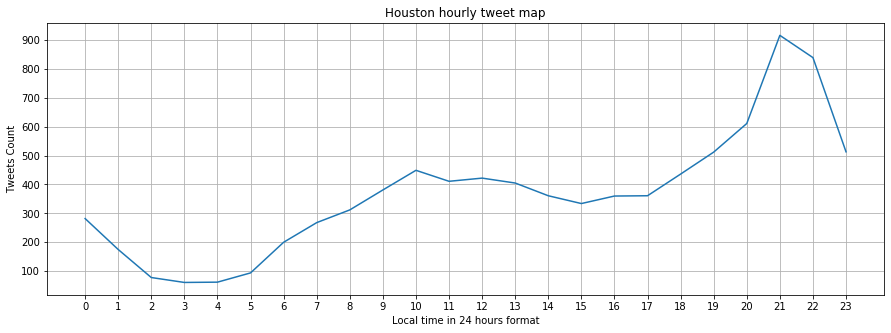

In [0]:
typ_Fraud , cnt_Fraud = np.unique(houston_df_all_data['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Houston hourly tweet map')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.set_yticks( range(0,1000,100) )
ax1.grid('on')
_ = ax1.plot(typ_Fraud ,cnt_Fraud)

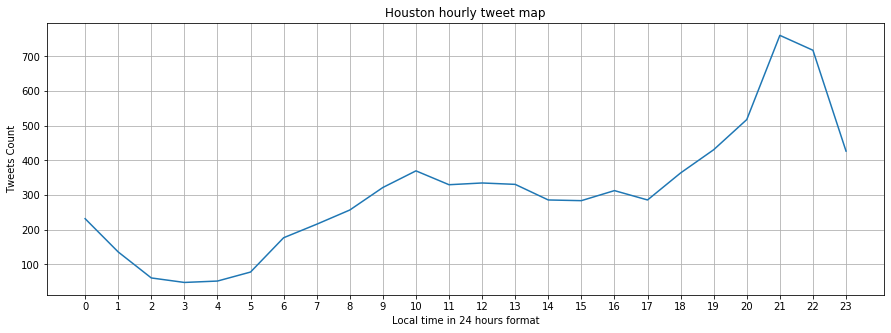

In [0]:
typ_Fraud , cnt_Fraud = np.unique(houston_df_us_data['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Houston hourly tweet map')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.set_yticks( range(0,800,100) )
ax1.grid('on')
_ = ax1.plot(typ_Fraud ,cnt_Fraud)

In [0]:
TimeZonegroupDF = us_tweets.groupby('TimeZone')

PST_America_Los_Angeles = TimeZonegroupDF.get_group('America/Los_Angeles')
hour_score(PST_America_Los_Angeles)

CST_America_Chicago = TimeZonegroupDF.get_group('America/Chicago')
hour_score(CST_America_Chicago)

EST_America_New_York = TimeZonegroupDF.get_group('America/New_York')
hour_score(EST_America_New_York)

MST_America_Denver = TimeZonegroupDF.get_group('America/Denver')
hour_score(MST_America_Denver)

AKST_America_Anchorage = TimeZonegroupDF.get_group('America/Anchorage')
hour_score(AKST_America_Anchorage)

HST_Pacific_Honolulu = TimeZonegroupDF.get_group('Pacific/Honolulu')
hour_score(HST_Pacific_Honolulu)


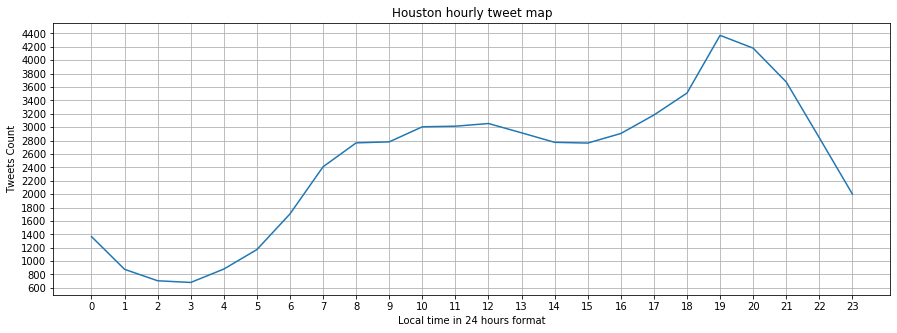

In [0]:
typ_Fraud , cnt_Fraud = np.unique(PST_America_Los_Angeles['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('PST_America_Los_Angeles hourly tweet map')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.set_yticks( range(0,4600,200) )
ax1.grid('on')
_ = ax1.plot(typ_Fraud ,cnt_Fraud)

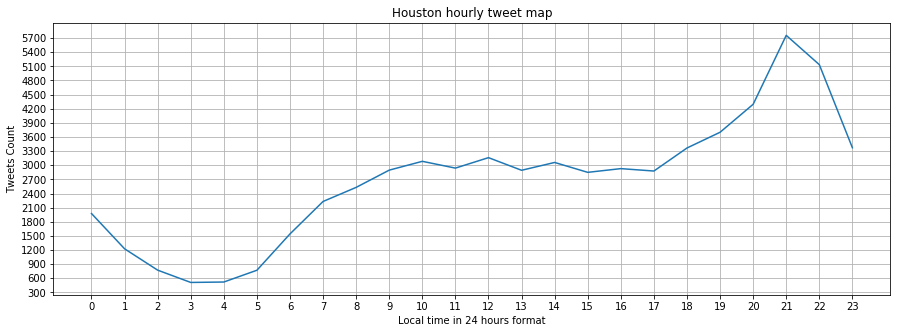

In [0]:
typ_Fraud , cnt_Fraud = np.unique(CST_America_Chicago['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('CST_America_Chicago hourly tweet map')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.set_yticks( range(0,6000,300) )
ax1.grid('on')
_ = ax1.plot(typ_Fraud ,cnt_Fraud)

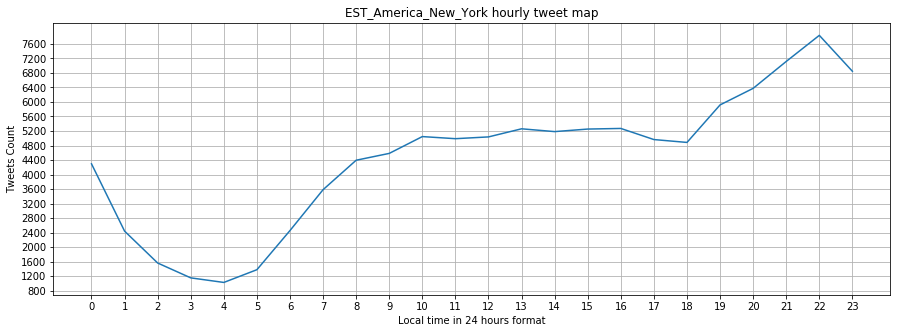

In [0]:
typ_Fraud , cnt_Fraud = np.unique(EST_America_New_York['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('EST_America_New_York hourly tweet map')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.set_yticks( range(0,8000,400) )
ax1.grid('on')
_ = ax1.plot(typ_Fraud ,cnt_Fraud)

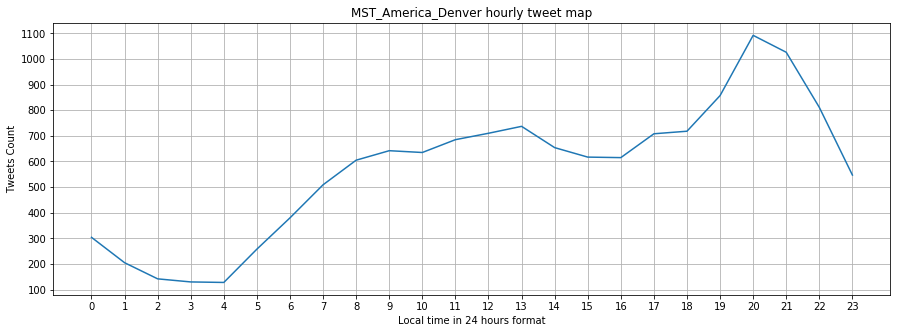

In [0]:
typ_Fraud , cnt_Fraud = np.unique(MST_America_Denver['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('MST_America_Denver hourly tweet map')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.set_yticks( range(0,1200,100) )
ax1.grid('on')
_ = ax1.plot(typ_Fraud ,cnt_Fraud)

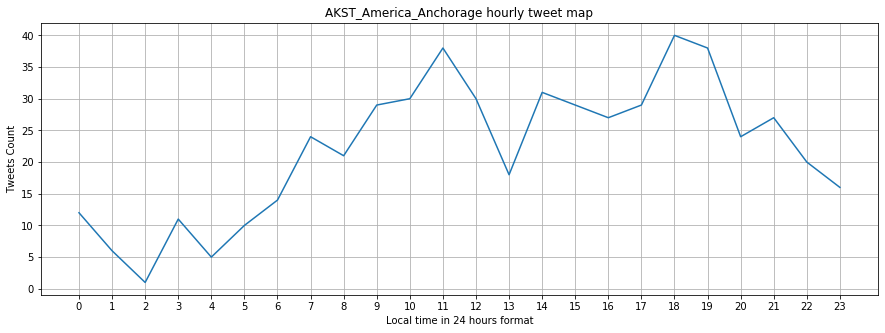

In [0]:
typ_Fraud , cnt_Fraud = np.unique(AKST_America_Anchorage['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('AKST_America_Anchorage hourly tweet map')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.set_yticks( range(0,100,5) )
ax1.grid('on')
_ = ax1.plot(typ_Fraud ,cnt_Fraud)

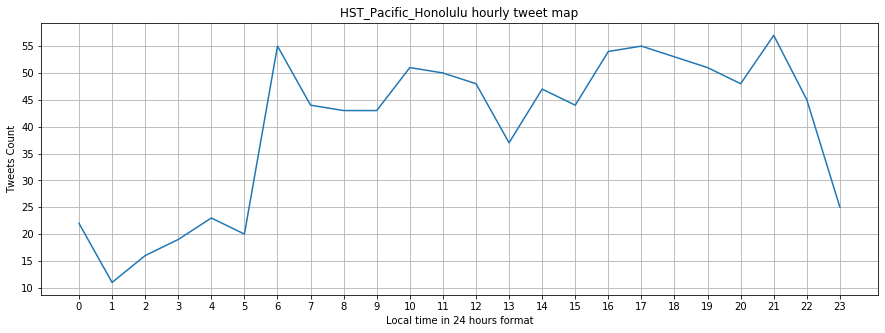

In [0]:
typ_Fraud , cnt_Fraud = np.unique(HST_Pacific_Honolulu['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('HST_Pacific_Honolulu hourly tweet map')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.set_yticks( range(0,100,5) )
ax1.grid('on')
_ = ax1.plot(typ_Fraud ,cnt_Fraud)